![Global_Mortality](https://github.com/harishmuh/Global_Mortality_Indonesia/blob/main/global_mortality_illustration.png?raw=true)

# **Global mortality analysis and insight of 30 years of Indonesia's data**

Created by Harish Muhammad

## **Business Understanding**

### **Context**

Global healthcare expenditure has steadily increased, with countries allocating substantial portions (5–12%) of their GDP to healthcare (IPSOS, 2023 & IHME, 2013). Like many other nations, Indonesia faces the challenge of balancing rising healthcare costs with effective public health interventions. Indonesia's healthcare budget is projected to increase by 8.1% in 2024, reaching IDR 184.6 trillion compared to the previous year (Indonesia's Ministry of Health, 2023).

However, questions arise: Has rising healthcare expenditure improved the population health of the nation? Is the allocation of funding for healthcare and public health in line with objectives and priorities? Are there alternative metrics to guide better decisions?

It's difficult to answer these questions directly. 
However, insights might be found by examining global mortality data, as these data potentially represent population health. Interestingly, the Global Burden of Disease (GBD) study, led by the Institute for Health Metrics and Evaluation (IHME), quantifies health loss due to diseases, injuries, and risk factors worldwide. By analyzing global mortality trends, we can obtain useful insights into the factors and dominant causes of mortality. This is crucial for the Indonesian government in prioritizing funding and formulating evidence-based policies. Additionally, the healthcare industry can gain insights from these trends to identify opportunities for providing solutions.

### **Questions**
Through this data analysis project, we aim to answer the following question: 
**What are the key insights and recommendations that can be obtained from global mortality cause data to improve the population health of Indonesia?**

## **Data Understanding and Data Cleaning**

### **Data Source**

The raw data were obtained from the website of [Our World in Data](https://ourworldindata.org/causes-of-death). The data were collected by IHME, at the University of Washington, in collaboration with international health organizations like WHO.

### **Dataset and Libraries**

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from scipy.stats import normaltest

# Other libraries
import warnings
warnings.filterwarnings("ignore")

# Customizing with 'ggplot' style
plt.style.use('ggplot')

In [2]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Loading dataset
df = pd.read_csv('20220327 annual-number-of-deaths-by-cause.csv')

# Displaying dataset
display(df.head(), df.tail())

Entity Code  Year Number of executions (Amnesty International)  \
0  Afghanistan  AFG  2007                                           15   
1  Afghanistan  AFG  2008                                           17   
2  Afghanistan  AFG  2009                                            0   
3  Afghanistan  AFG  2011                                            2   
4  Afghanistan  AFG  2012                                           14   

   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
0                                                    2933.0   
1                                                    2731.0   
2                                                    2460.0   
3                                                    2327.0   
4                                                    2254.0   

   Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)  \
0                                                  15925.0   
1                                                  16148.0   
2                                                  16383.0   
3                                                  17094.0   
4                                                  17522.0   

   Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)  \
0                                                                         481.0   
1                                                                         462.0   
2                                                                         448.0   
3                                                                         448.0   
4                                                                         445.0   

   Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
0                                                  393.0   
1                                                  255.0   
2                                                  239.0   
3                                                  390.0   
4                                                   94.0   

   Deaths - Drowning - Sex: Both - Age: All Ages (Number)  \
0                                                  2127.0   
1                                                  1973.0   
2                                                  1852.0   
3                                                  1775.0   
4                                                  1716.0   

   Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)  \
0                                                                3657.0   
1                                                                3785.0   
2                                                                3874.0   
3                                                                4170.0   
4                                                                4245.0   

   Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)  \
0                                                   148.0   
1                                                   157.0   
2                                                   167.0   
3                                                   184.0   
4                                                   191.0   

   Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)  \
0                                                             252.0   
1                                                             261.0   
2                                                             270.0   
3                                                             292.0   
4                                                             305.0   

   Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)  \
0                                                      4995.0   
1                                                      4790.0   
2                                                      4579.0   
3                                                      4259.0   
4             

Entity Code  Year Number of executions (Amnesty International)  \
8249  Zimbabwe  ZWE  2015                                          NaN   
8250  Zimbabwe  ZWE  2016                                          NaN   
8251  Zimbabwe  ZWE  2017                                          NaN   
8252  Zimbabwe  ZWE  2018                                          NaN   
8253  Zimbabwe  ZWE  2019                                          NaN   

      Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
8249                                                    1439.0   
8250                                                    1457.0   
8251                                                    1460.0   
8252                                                    1450.0   
8253                                                    1450.0   

      Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)  \
8249                                                  11161.0   
8250                                                  11465.0   
8251                                                  11744.0   
8252                                                  12038.0   
8253                                                  12353.0   

      Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)  \
8249                                                                         632.0   
8250                                                                         648.0   
8251                                                                         654.0   
8252                                                                         657.0   
8253                                                                         662.0   

      Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
8249                                                 2518.0   
8250                                                 2050.0   
8251                                                 2116.0   
8252                                                 2088.0   
8253                                                 2068.0   

      Deaths - Drowning - Sex: Both - Age: All Ages (Number)  \
8249                                                   770.0   
8250                                                   801.0   
8251                                                   818.0   
8252                                                   825.0   
8253                                                   827.0   

      Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)  \
8249                                                                1302.0   
8250                                                                1342.0   
8251                                                                1363.0   
8252                                                                1396.0   
8253                                                                1434.0   

      Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)  \
8249                                                 29162.0   
8250                                                 27141.0   
8251                                                 24846.0   
8252                                                 22106.0   
8253                                                 20722.0   

      Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)  \
8249                                                             104.0   
8250                                                             110.0   
8251                                                             115.0   
8252                                                             121.0   
8253                                                             127.0   

      Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)  \
8249                                                     11214.0   
8250                                                     10

In [3]:
# Data summary (raw dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 36 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    8254 non-null   object 
 1   Code                                                                                      6206 non-null   object 
 2   Year                                                                                      8254 non-null   int64  
 3   Number of executions (Amnesty International)                                              267 non-null    object 
 4   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                  8010 non-null   float64
 5   Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)

## Dataset Glossary
01. **Entity** - Name of the Area/Country/Territory
02. **Code** - Country/Territory Code
03. **Year** - Year of the Incident
04. **Meningitis** - No. of People died from meningitis
05. **Alzheimer's Disease and Other Dementias** - No. of People died from alzheimer's Disease and Other dementias
06. **Parkinson's Disease** - No. of People died from Parkinson's disease
07. **Nutritional Deficiencies** - No. of People died from nutritional deficiencies or malnourishment
08. **Malaria** - No. of People died from malaria
09. **Drowning** - No. of People died from drowning
10. **Interpersonal Violence** - No. of People died from violence
11. **Maternal Disorders** - No. of People died from Maternal Disorders
12. **Drug Use Disorders** - No. of People died from drug abuse
13. **Tuberculosis** - No. of People died from tuberculosis
14. **Cardiovascular Diseases** - No. of People died from cardiovascular or heart diseases
15. **Lower Respiratory Infections** - No. of People died from lower respiratory infections or chest infections
16. **Neonatal Disorders** - No. of People died from newborn health issues
17. **Alcohol Use Disorders** - No. of People died from alcohol use
18. **Self-harm** - No. of People died from self-harm
19. **Exposure to Forces of Nature** - No. of People died from exposure to forces of nature or natural disasters
20. **Diarrheal Diseases** - No. of People died from diarrheal diseases
21. **Environmental Heat and Cold Exposure** - No. of People died from environmental heat and cold exposure or extreme weather
22. **Neoplasms** - No. of People died from neoplasms (Malignancy/Cancer)
23. **Conflict and Terrorism** - No. of People died from war, conflict and terrorism
24. **Diabetes Mellitus** - No. of People died from diabetes mellitus
25. **Chronic Kidney Disease** - No. of People died from chronic kidney disease or kidney failure
26. **Poisonings** - No. of People died from poisoning
27. **Protein-Energy Malnutrition** - No. of People died from Protein-Energy Malnutrition
28. **Chronic Respiratory Diseases** - No. of People died from chronic respiratory diseases (e.g, Pneumonia)
29. **Cirrhosis and Other Chronic Liver Diseases** - No. of People died from liver cirrhosis and other chronic liver diseases
30. **Digestive Diseases** - No. of People died from Digestive Diseases
31. **Fire, Heat, and Hot Substances** - No. of People died from fire or heat or any hot Substances
32. **Acute Hepatitis** - No. of People died from acute hepatitis
33. **Number of executions (Amnesty International)** - No. of People died from executed due to violation of laws
34. **Terrorism (deaths)** - No. of People died from terrorism
35. **HIV/AIDS** - No. of People died from HIV/AIDS
36. **Road Injuries** - No. of People died from road injuries


In [4]:
# Checking unique values from columns
# Checking Characteristics of features or columns including unique values, data type and missing values

pd.DataFrame({
    'feature/column': df.columns.values,
    'data_type': df.dtypes.values,
    'negative_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'number_of_unique': df.nunique().values,
    'unique_value_sample': [df[col].unique() for col in df.columns]
})

feature/column  \
0                                                                                     Entity   
1                                                                                       Code   
2                                                                                       Year   
3                                               Number of executions (Amnesty International)   
4                                   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)   
5                                    Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)   
6               Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)   
7                                      Deaths - Malaria - Sex: Both - Age: All Ages (Number)   
8                                     Deaths - Drowning - Sex: Both - Age: All Ages (Number)   
9                       Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)   
10                                    Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)   
11                          Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)   
12                                Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)   
13                               Deaths - Road injuries - Sex: Both - Age: All Ages (Number)   
14                          Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)   
15                Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)   
16                          Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)   
17                       Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)   
18                Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)   
19                          Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)   
20        Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)   
21                    Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)   
22                                   Deaths - Self-harm - Sex: Both - Age: All Ages (Number)   
23                      Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)   
24                           Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)   
25                                  Deaths - Poisonings - Sex: Both - Age: All Ages (Number)   
26                 Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)   
27                                                                        Terrorism (deaths)   
28                     Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)   
29                      Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)   
30                Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)   
31  Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)   
32                          Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)   
33                             Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)   
34     Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)   
35                         Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)   

   data_type  negative_value  number_of_unique  \
0     object           False               293   
1     object           False               217   
2      int64           False                30   
3     object           False                81   
4    float64           False              3443   
5    float64           False              6615   
6    float64           False              2893   
7    float64           False              2708   
8    float64           False              3408   
9    float64           Fa

### **Handling Duplicates**

In [5]:
# Checking duplicated data
df.duplicated().sum()

0

### **Handling Missing Values**

In [6]:
# Calculating missing values from every columns
df.isna().sum().to_frame().rename(columns={0:'Missing values'}).reset_index()

index  \
0                                                                                     Entity   
1                                                                                       Code   
2                                                                                       Year   
3                                               Number of executions (Amnesty International)   
4                                   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)   
5                                    Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)   
6               Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)   
7                                      Deaths - Malaria - Sex: Both - Age: All Ages (Number)   
8                                     Deaths - Drowning - Sex: Both - Age: All Ages (Number)   
9                       Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)   
10                                    Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)   
11                          Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)   
12                                Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)   
13                               Deaths - Road injuries - Sex: Both - Age: All Ages (Number)   
14                          Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)   
15                Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)   
16                          Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)   
17                       Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)   
18                Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)   
19                          Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)   
20        Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)   
21                    Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)   
22                                   Deaths - Self-harm - Sex: Both - Age: All Ages (Number)   
23                      Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)   
24                           Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)   
25                                  Deaths - Poisonings - Sex: Both - Age: All Ages (Number)   
26                 Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)   
27                                                                        Terrorism (deaths)   
28                     Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)   
29                      Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)   
30                Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)   
31  Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)   
32                          Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)   
33                             Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)   
34     Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)   
35                         Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)   

    Missing values  
0                0  
1             2048  
2                0  
3             7987  
4              244  
5              244  
6              244  
7              244  
8              244  
9              244  
10             244  
11             244  
12             244  
13             244  
14             244  
15             244  
16             244  
17             244  
18             244  
19             244  
20             244  
21             244  
22             244  
23             244  
24       

In [7]:
# Calculating the percentage of missing values from every columns
df_miss_percent =df.isna().sum()* 100/len(df)  
df_miss_percent.to_frame().rename(columns={0:'Percentage of Missing values'}).reset_index()

index  \
0                                                                                     Entity   
1                                                                                       Code   
2                                                                                       Year   
3                                               Number of executions (Amnesty International)   
4                                   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)   
5                                    Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)   
6               Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)   
7                                      Deaths - Malaria - Sex: Both - Age: All Ages (Number)   
8                                     Deaths - Drowning - Sex: Both - Age: All Ages (Number)   
9                       Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)   
10                                    Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)   
11                          Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)   
12                                Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)   
13                               Deaths - Road injuries - Sex: Both - Age: All Ages (Number)   
14                          Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)   
15                Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)   
16                          Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)   
17                       Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)   
18                Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)   
19                          Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)   
20        Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)   
21                    Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)   
22                                   Deaths - Self-harm - Sex: Both - Age: All Ages (Number)   
23                      Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)   
24                           Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)   
25                                  Deaths - Poisonings - Sex: Both - Age: All Ages (Number)   
26                 Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)   
27                                                                        Terrorism (deaths)   
28                     Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)   
29                      Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)   
30                Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)   
31  Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)   
32                          Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)   
33                             Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)   
34     Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)   
35                         Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)   

    Percentage of Missing values  
0                       0.000000  
1                      24.812212  
2                       0.000000  
3                      96.765205  
4                       2.956142  
5                       2.956142  
6                       2.956142  
7                       2.956142  
8                       2.956142  
9                       2.956142  
10                      2.956142  
11                      2.956142  
12                      2.956142  
13                      2.956142  
14       

<Axes: >

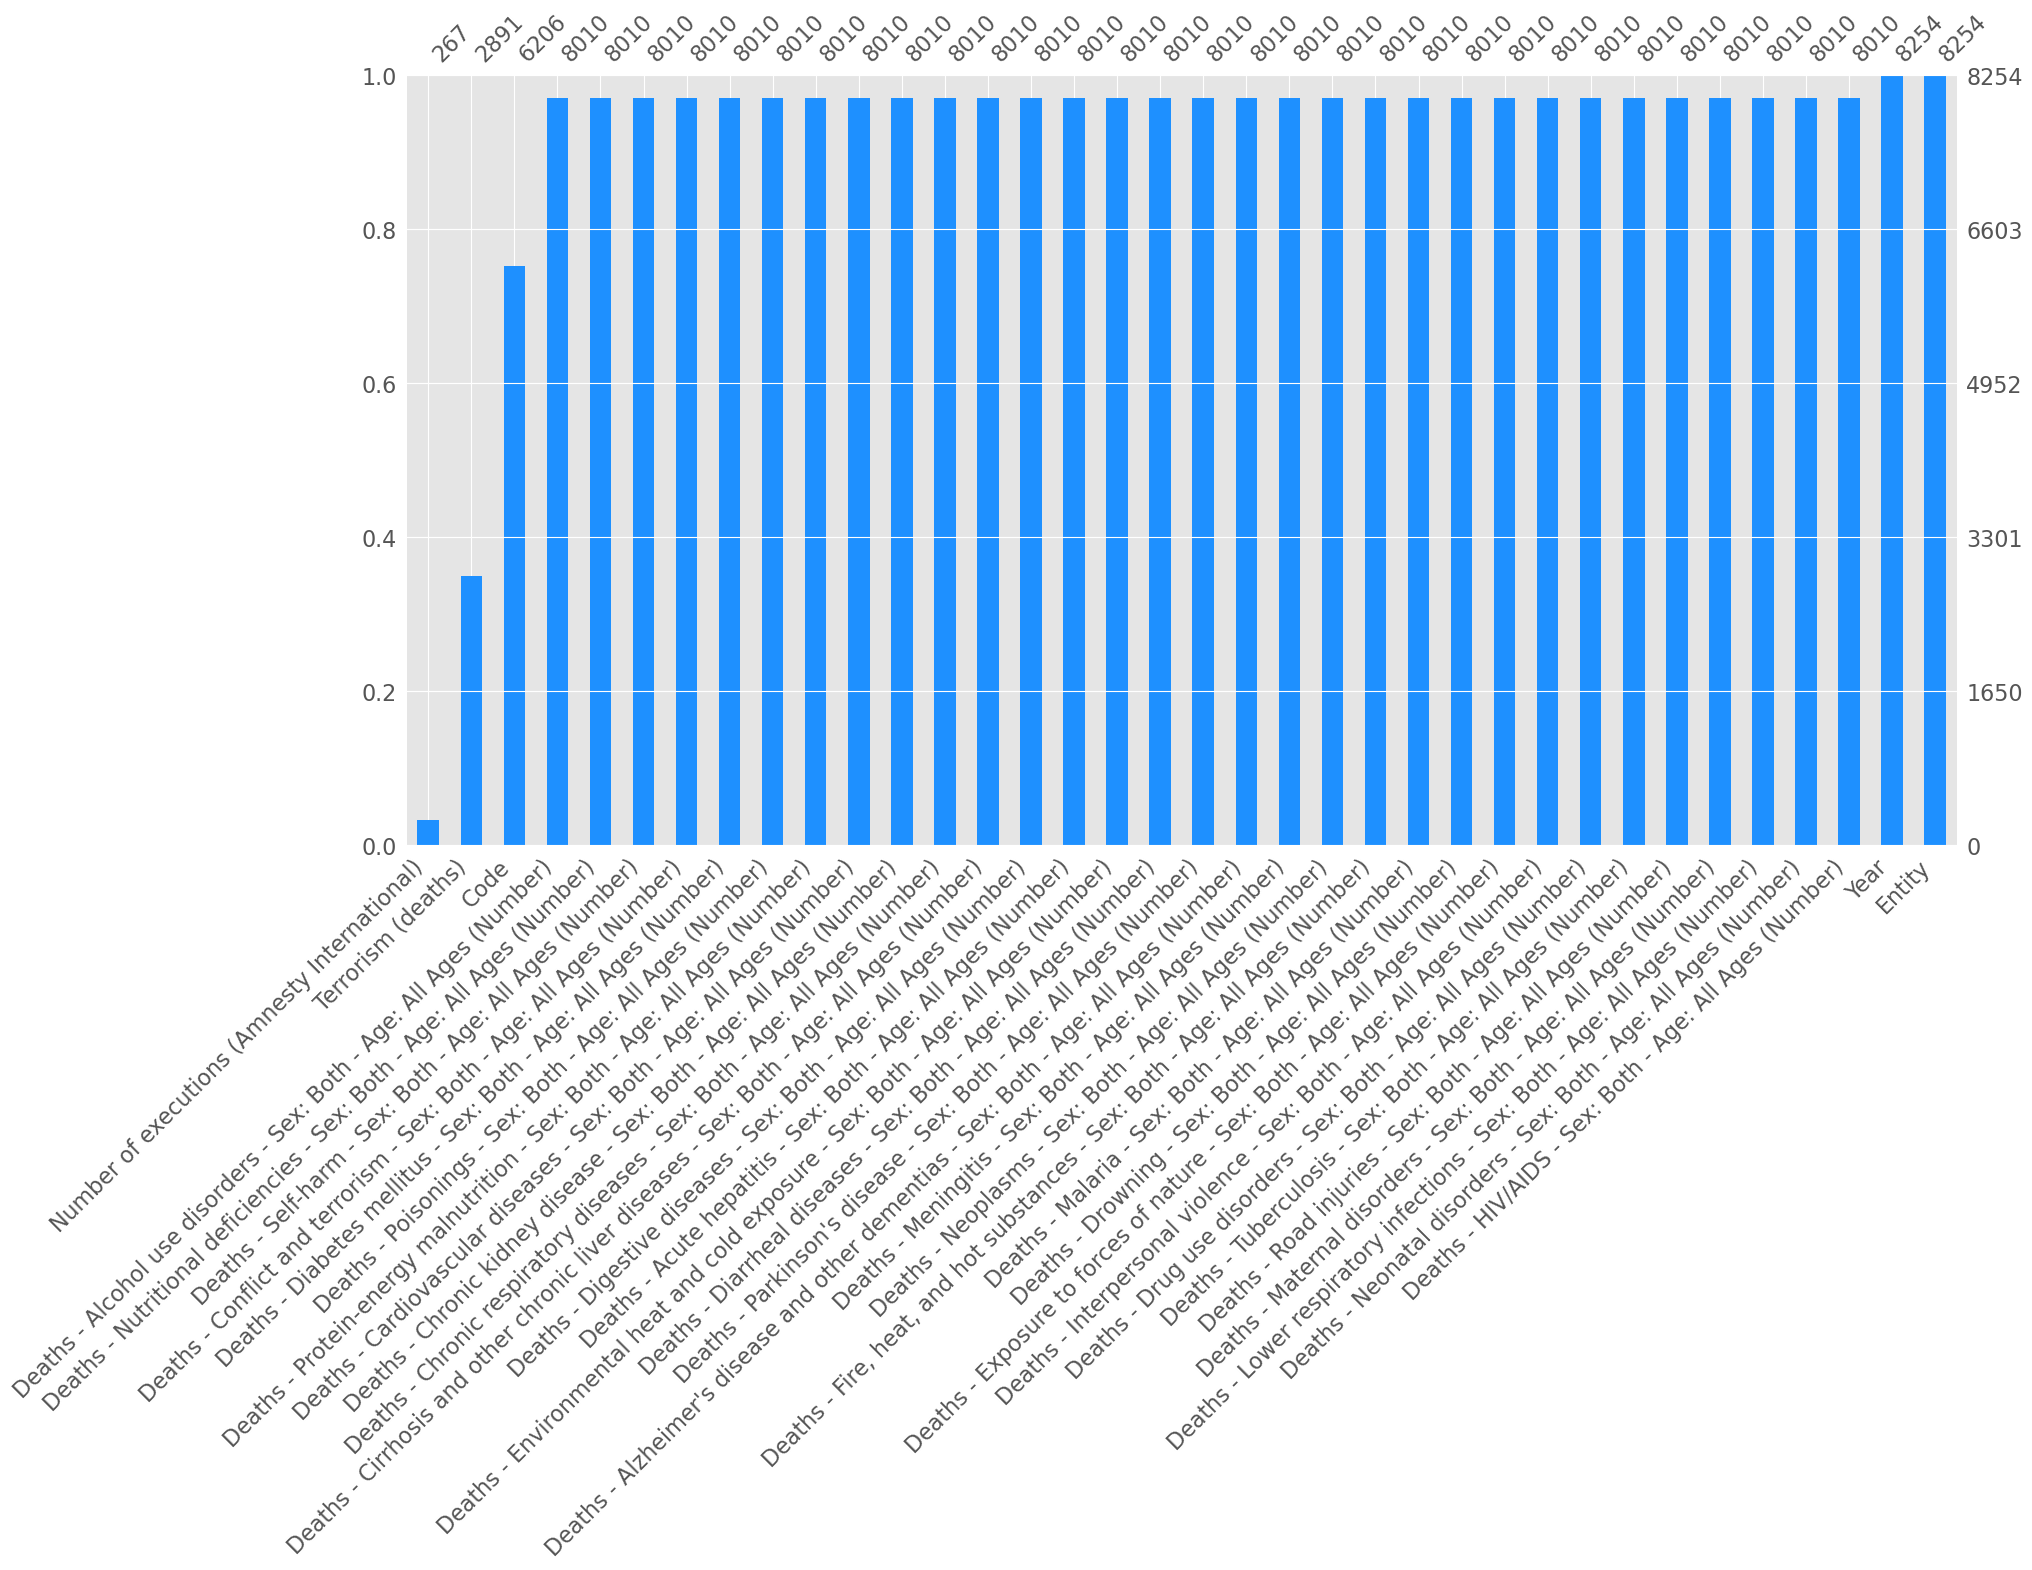

In [8]:
# Visualization of missing value number proportion
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(20,10))

<Axes: >

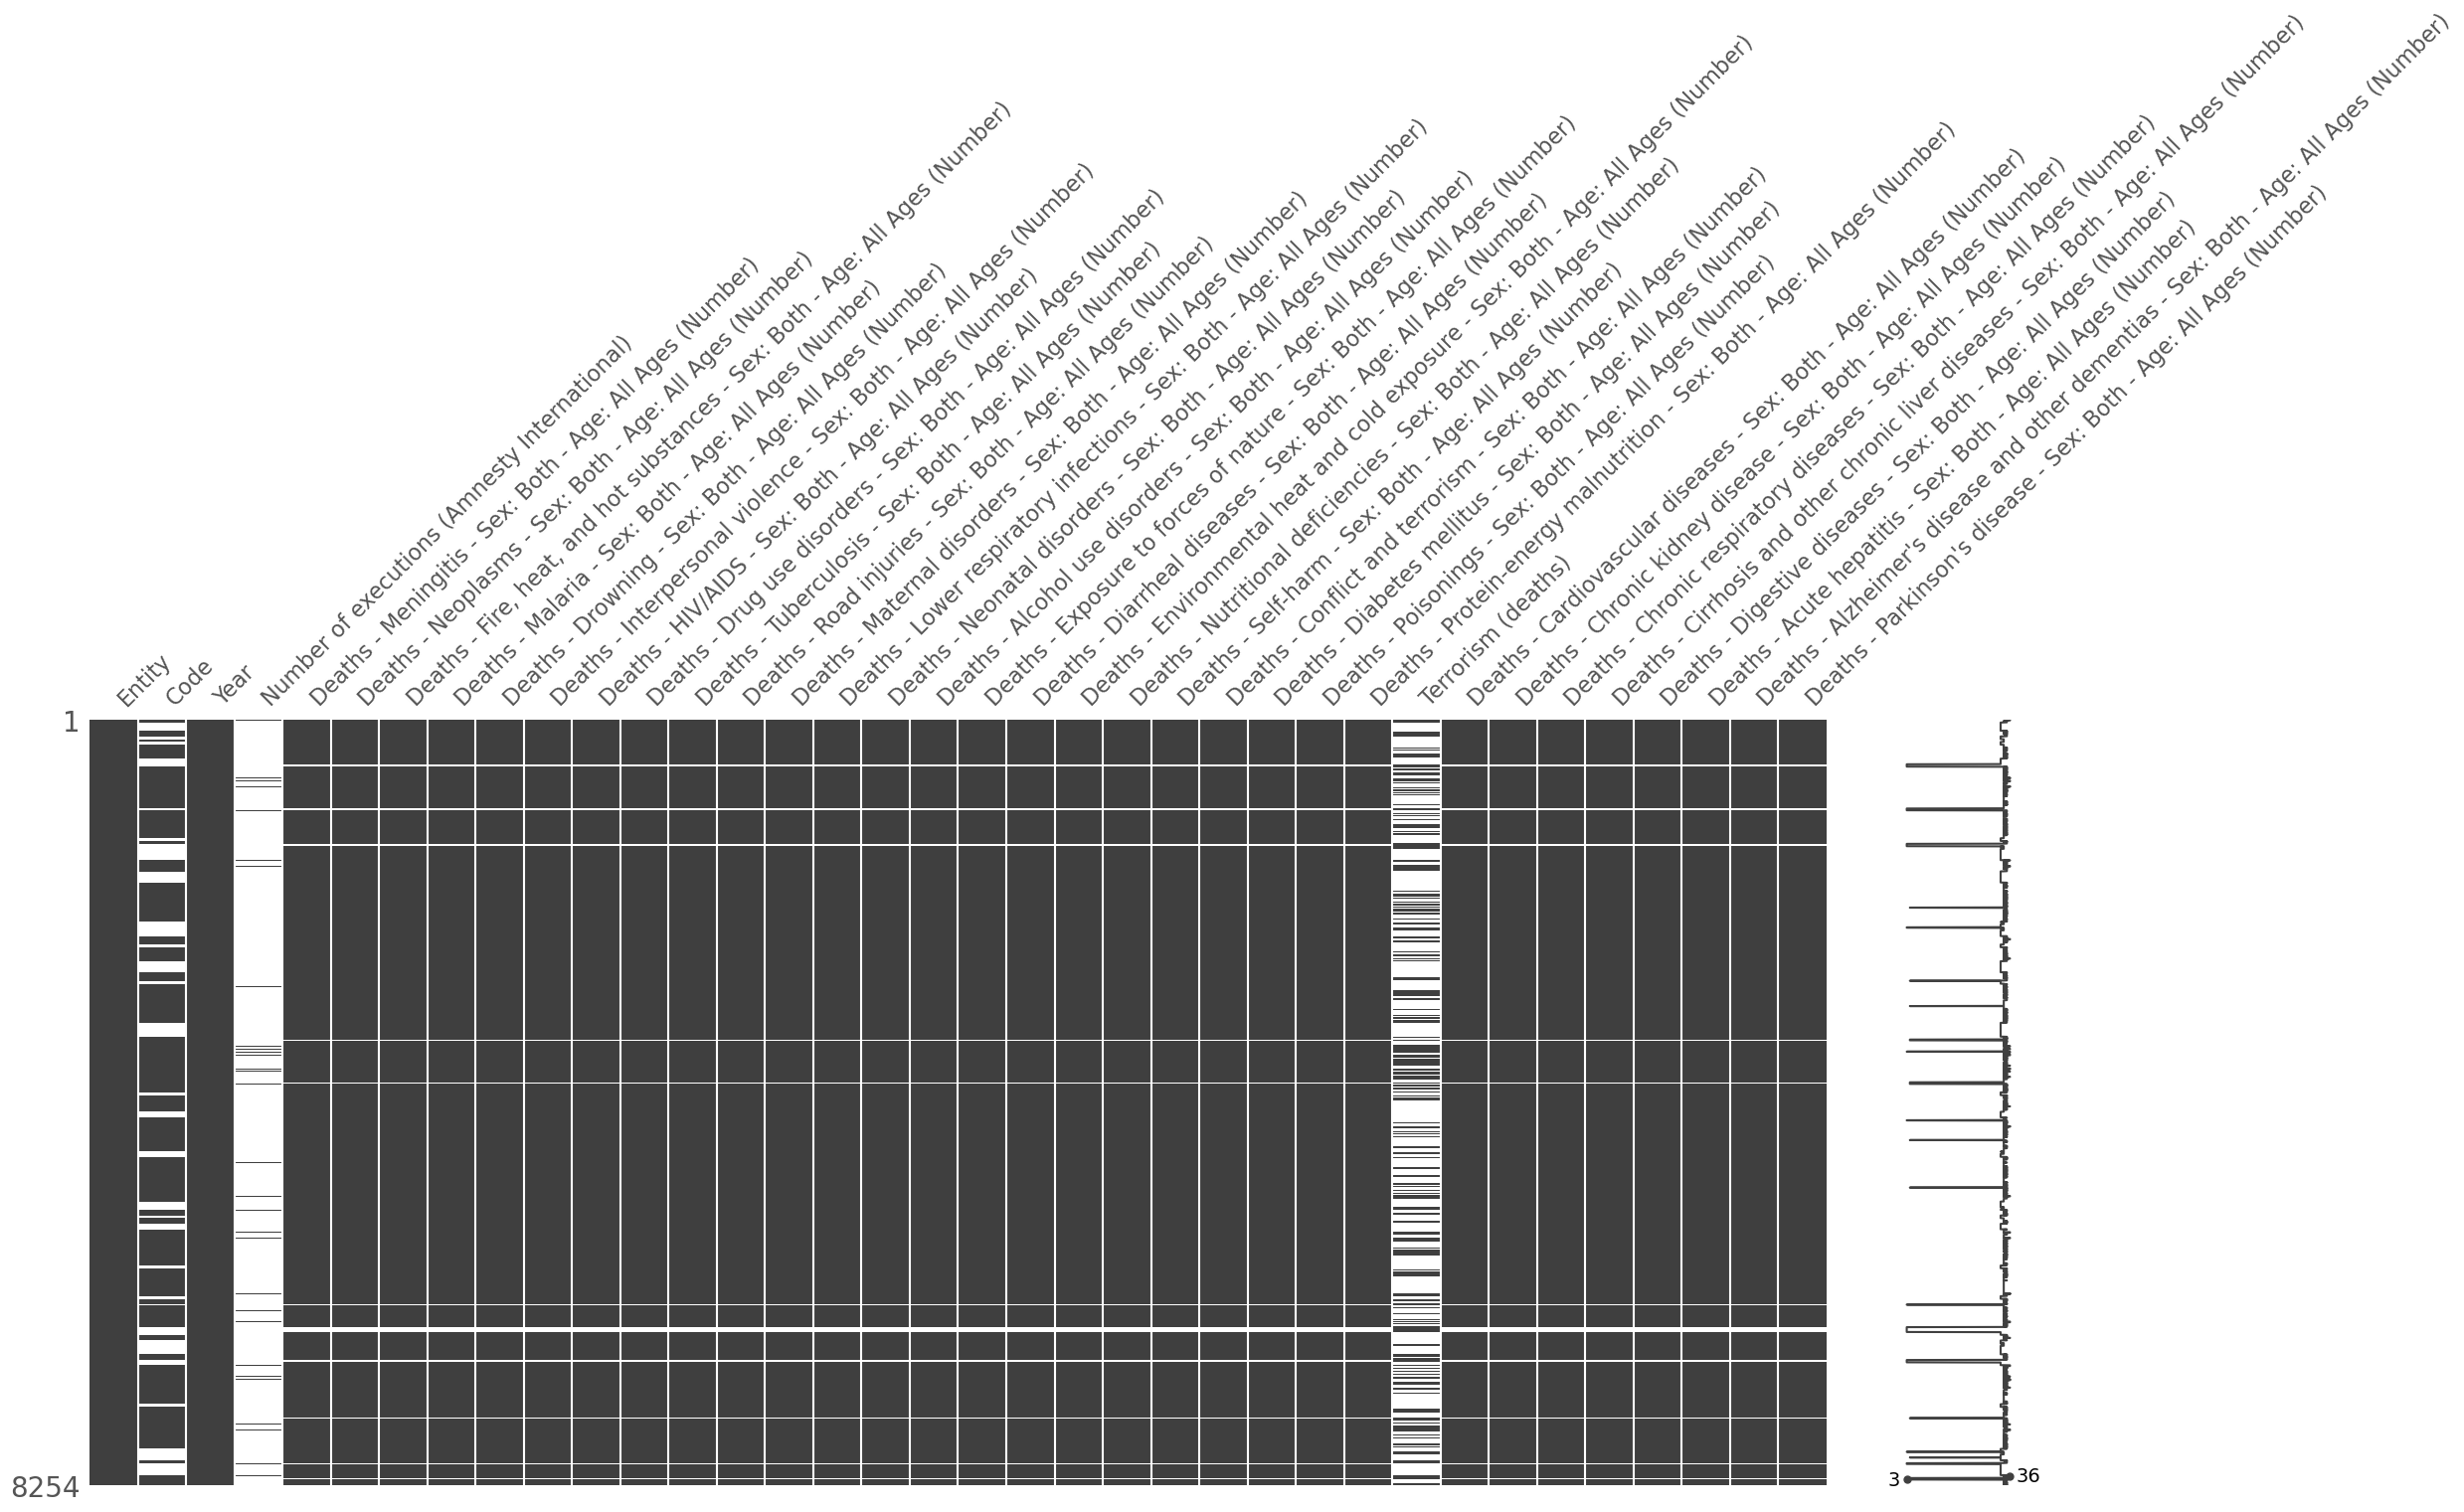

In [9]:
missingno.matrix(df)

<Axes: >

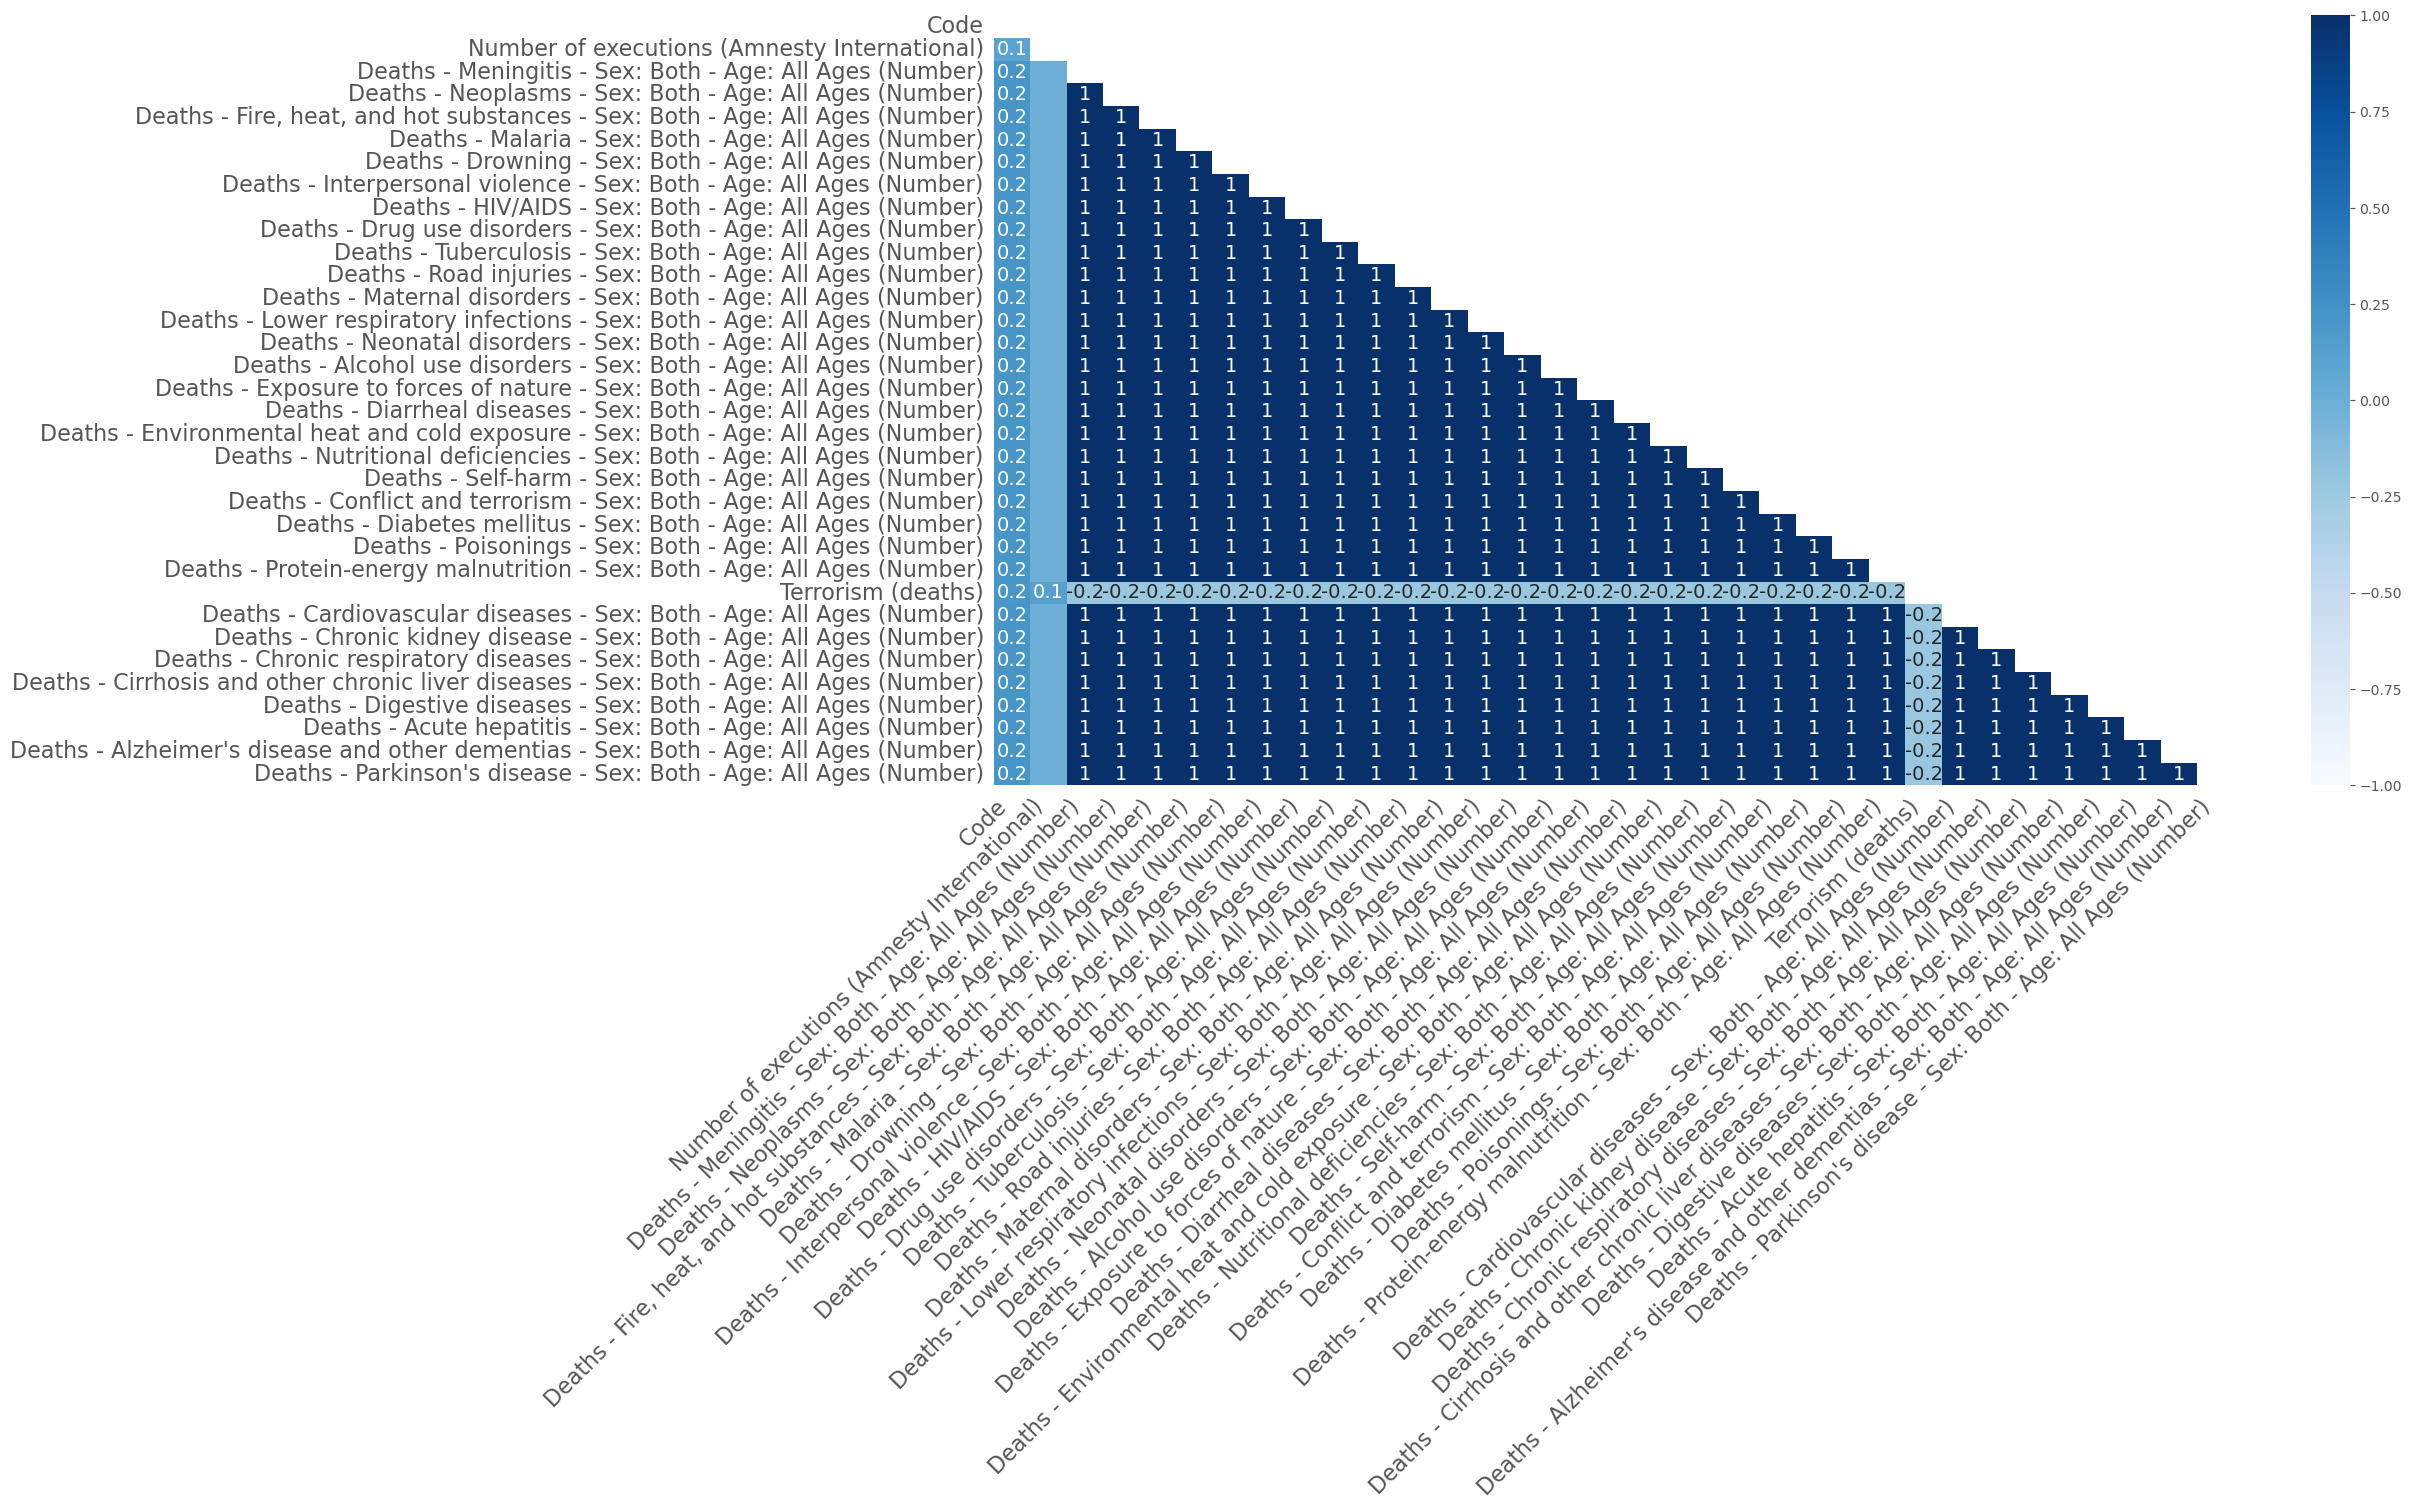

In [10]:
# Heatmap between two columns with missing values
missingno.heatmap(df, cmap="Blues", figsize=(20,10))

In [11]:
# Displaying rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values[['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)',
       'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)',
       'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)',
       'Deaths - Self-harm - Sex: Both - Age: All Ages (Number)',
       'Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)',
       'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)',
       'Deaths - Poisonings - Sex: Both - Age: All Ages (Number)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)',
       'Terrorism (deaths)',
       'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)',
       'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)',
       "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
       "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)"]]

Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
9                                                       2159.0   
10                                                      2218.0   
11                                                      2475.0   
12                                                      2812.0   
13                                                      3027.0   
...                                                        ...   
8249                                                    1439.0   
8250                                                    1457.0   
8251                                                    1460.0   
8252                                                    1450.0   
8253                                                    1450.0   

      Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)  \
9                                                     11580.0   
10                                                    11796.0   
11                                                    12218.0   
12                                                    12634.0   
13                                                    12914.0   
...                                                       ...   
8249                                                  11161.0   
8250                                                  11465.0   
8251                                                  11744.0   
8252                                                  12038.0   
8253                                                  12353.0   

      Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)  \
9                                                                            323.0   
10                                                                           332.0   
11                                                                           360.0   
12                                                                           396.0   
13                                                                           420.0   
...                                                                            ...   
8249                                                                         632.0   
8250                                                                         648.0   
8251                                                                         654.0   
8252                                                                         657.0   
8253                                                                         662.0   

      Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
9                                                      93.0   
10                                                    189.0   
11                                                    239.0   
12                                                    108.0   
13                                                    211.0   
...                                                     ...   
8249                                                 2518.0   
8250                                                 2050.0   
8251                                                 2116.0   
8252                                                 2088.0   
8253                                                 2068.0   

      Deaths - Drowning - Sex: Both - Age: All Ages (Number)  \
9                                                     1370.0   
10                                                    1391.0   
11                                                    1514.0   
12                                                    1687.0   
13                                                    1809.0   
...                                                      ...   
8249                                                   770.0   
8250                                                   801.0   
8251                                                   818.0   
82

In [12]:
# Filtering with two conditions to check relationship between missing values
df[(df['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)'].isna() == True) & (df['Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)'].isna() == True)]

Entity Code  Year  \
480   Australasia & Oceania  NaN  1990   
481   Australasia & Oceania  NaN  1991   
482   Australasia & Oceania  NaN  1992   
483   Australasia & Oceania  NaN  1994   
484   Australasia & Oceania  NaN  1995   
...                     ...  ...   ...   
8189                  Zaire  NaN  1992   
8190                  Zaire  NaN  1994   
8191                  Zaire  NaN  1995   
8192                  Zaire  NaN  1996   
8193                  Zaire  NaN  1997   

     Number of executions (Amnesty International)  \
480                                           NaN   
481                                           NaN   
482                                           NaN   
483                                           NaN   
484                                           NaN   
...                                           ...   
8189                                          NaN   
8190                                          NaN   
8191                                          NaN   
8192                                          NaN   
8193                                          NaN   

      Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
480                                                        NaN   
481                                                        NaN   
482                                                        NaN   
483                                                        NaN   
484                                                        NaN   
...                                                        ...   
8189                                                       NaN   
8190                                                       NaN   
8191                                                       NaN   
8192                                                       NaN   
8193                                                       NaN   

      Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)  \
480                                                       NaN   
481                                                       NaN   
482                                                       NaN   
483                                                       NaN   
484                                                       NaN   
...                                                       ...   
8189                                                      NaN   
8190                                                      NaN   
8191                                                      NaN   
8192                                                      NaN   
8193                                                      NaN   

      Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)  \
480                                                                            NaN   
481                                                                            NaN   
482                                                                            NaN   
483                                                                            NaN   
484                                                                            NaN   
...                                                                            ...   
8189                                                                           NaN   
8190                                                                           NaN   
8191                                                                           NaN   
8192                                                                           NaN   
8193                                                                           NaN   

      Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
480                                                     NaN   
481                                                     NaN   
482                                                     NaN   
483                 

In [13]:
# Filtering with two conditions to keep rows where either of the columns has missing values
df_filtered = df[~((df['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)'].isna()) & (df['Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)'].isna()))]

# If you want to modify the original DataFrame, you can assign df_filtered back to df
df = df_filtered


In [14]:
# Calculating missing value from every columns
df.isna().sum().to_frame().rename(columns={0:'Missing values'}).reset_index()

index  \
0                                                                                     Entity   
1                                                                                       Code   
2                                                                                       Year   
3                                               Number of executions (Amnesty International)   
4                                   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)   
5                                    Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)   
6               Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)   
7                                      Deaths - Malaria - Sex: Both - Age: All Ages (Number)   
8                                     Deaths - Drowning - Sex: Both - Age: All Ages (Number)   
9                       Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)   
10                                    Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)   
11                          Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)   
12                                Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)   
13                               Deaths - Road injuries - Sex: Both - Age: All Ages (Number)   
14                          Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)   
15                Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)   
16                          Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)   
17                       Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)   
18                Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)   
19                          Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)   
20        Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)   
21                    Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)   
22                                   Deaths - Self-harm - Sex: Both - Age: All Ages (Number)   
23                      Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)   
24                           Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)   
25                                  Deaths - Poisonings - Sex: Both - Age: All Ages (Number)   
26                 Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)   
27                                                                        Terrorism (deaths)   
28                     Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)   
29                      Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)   
30                Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)   
31  Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)   
32                          Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)   
33                             Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)   
34     Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)   
35                         Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)   

    Missing values  
0                0  
1             1860  
2                0  
3             7753  
4                0  
5                0  
6                0  
7                0  
8                0  
9                0  
10               0  
11               0  
12               0  
13               0  
14               0  
15               0  
16               0  
17               0  
18               0  
19               0  
20               0  
21               0  
22               0  
23               0  
24       

In [15]:
# Checking the dimension of the data
df.shape

(8010, 36)

In [16]:
# Checking number of year
df['Year'].value_counts().to_frame()

count
Year       
2007    267
2008    267
2018    267
2017    267
2010    267
2006    267
2005    267
2004    267
2003    267
2002    267
2001    267
2000    267
1999    267
1998    267
1997    267
1996    267
1995    267
1994    267
1993    267
1992    267
1991    267
1990    267
2016    267
2015    267
2014    267
2013    267
2012    267
2011    267
2009    267
2019    267

In [17]:
# Reviewing the column of 'Country/Territory'
df['Entity'].nunique()

# 204 countries data are being provided

267

In [18]:
# Displaying 'entity' column
pd.set_option('display.max_rows', None)
# Reviewing the name of the country inside the column
df['Entity'].value_counts().to_frame().sort_values('Entity')

count
Entity                                                 
Afghanistan                                          30
Africa                                               30
African Region                                       30
African Union                                        30
Albania                                              30
Algeria                                              30
America                                              30
American Samoa                                       30
Andean Latin America                                 30
Andorra                                              30
Angola                                               30
Antigua and Barbuda                                  30
Argentina                                            30
Armenia                                              30
Asia                                                 30
Australasia                                          30
Australia                                            30
Austria                                              30
Azerbaijan                                           30
Bahamas                                              30
Bahrain                                              30
Bangladesh                                           30
Barbados                                             30
Belarus                                              30
Belgium                                              30
Belize                                               30
Benin                                                30
Bermuda                                              30
Bhutan                                               30
Bolivia                                              30
Bosnia and Herzegovina                               30
Botswana                                             30
Brazil                                               30
Brunei                                               30
Bulgaria                                             30
Burkina Faso                                         30
Burundi                                              30
Cambodia                                             30
Cameroon                                             30
Canada                                               30
Cape Verde                                           30
Caribbean                                            30
Central African Republic                             30
Central Asia                                         30
Central Europe                                       30
Central Europe, Eastern Europe, and Central Asia     30
Central Latin America                                30
Central sub-Saharan Africa                           30
Chad                                                 30
Chile                                                30
China                                                30
Colombia                                             30
Commonwealth                                         30
Commonwealth High Income                             30
Commonwealth Low Income                              30
Commonwealth Middle Income                           30
Comoros                                              30
Congo                                                30
Cook Islands                                         30
Costa Rica                                           30
Cote d'Ivoire                                        30
Croatia                                              30
Cuba                                                 30
Cyprus                                               30
Czechia                                              30
Democratic Republic of Congo                         30
Denmark                                              30
Djibouti                                             30
Dominica                                             30
Dominican Republic                                   30
East Asia         

### **Selecting & Filtering Relevant Rows**

In [19]:
# Selecting and filtering rows that contain only country names to focus solely on mortality data for individual countries
countries = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guam',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
       'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius',
       'Mexico', 'Micronesia (country)', 'Moldova', 'Monaco', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Niger', 'Nigeria', 'Niue', 'North Korea', 'North Macedonia',
       'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau',
       'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
       'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal',
       'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia',
       'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa',
       'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan',
       'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
       'Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Tokelau',
       'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

def filter_countries(df, countries):
    """
    Filter rows in a DataFrame where the 'Entity' column matches one of the specified countries.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - countries (list): A list of countries to filter.

    Returns:
    - DataFrame: Filtered DataFrame containing rows where 'Entity' matches one of the specified countries.
    """
    filtered_df = df[df['Entity'].isin(countries)]
    return filtered_df

# Example usage:
# Assuming df is your DataFrame and countries is the list of countries
filtered_df = filter_countries(df, countries)

In [20]:
# Checking the dimension of data
filtered_df.shape

(6120, 36)

In [21]:
# Displaying all content of entity
pd.set_option('display.max_rows', None)
# Reviewing the name of the country inside the column
filtered_df['Entity'].value_counts().to_frame().sort_values('Entity')

count
Entity                                 
Afghanistan                          30
Albania                              30
Algeria                              30
American Samoa                       30
Andorra                              30
Angola                               30
Antigua and Barbuda                  30
Argentina                            30
Armenia                              30
Australia                            30
Austria                              30
Azerbaijan                           30
Bahamas                              30
Bahrain                              30
Bangladesh                           30
Barbados                             30
Belarus                              30
Belgium                              30
Belize                               30
Benin                                30
Bermuda                              30
Bhutan                               30
Bolivia                              30
Bosnia and Herzegovina               30
Botswana                             30
Brazil                               30
Brunei                               30
Bulgaria                             30
Burkina Faso                         30
Burundi                              30
Cambodia                             30
Cameroon                             30
Canada                               30
Cape Verde                           30
Central African Republic             30
Chad                                 30
Chile                                30
China                                30
Colombia                             30
Comoros                              30
Congo                                30
Cook Islands                         30
Costa Rica                           30
Cote d'Ivoire                        30
Croatia                              30
Cuba                                 30
Cyprus                               30
Czechia                              30
Democratic Republic of Congo         30
Denmark                              30
Djibouti                             30
Dominica                             30
Dominican Republic                   30
Ecuador                              30
Egypt                                30
El Salvador                          30
Equatorial Guinea                    30
Eritrea                              30
Estonia                              30
Eswatini                             30
Ethiopia                             30
Fiji                                 30
Finland                              30
France                               30
Gabon                                30
Gambia                               30
Georgia                              30
Germany                              30
Ghana                                30
Greece                               30
Greenland                            30
Grenada                              30
Guam                                 30
Guatemala                            30
Guinea                               30
Guinea-Bissau                        30
Guyana                               30
Haiti                                30
Honduras                             30
Hungary                              30
Iceland                              30
India                                30
Indonesia                            30
Iran                                 30
Iraq                                 30
Ireland                              30
Israel                               30
Italy                                30
Jamaica                              30
Japan                                30
Jordan                               30
Kazakhstan                           30
Kenya                                30
Kiribati                             30
Kuwait                               30
Kyrgyzstan                           30
Laos                                 30
Latvia                               30
Lebanon                           

In [22]:
# Calculating missing value from every columns
filtered_df.isna().sum().to_frame().rename(columns={0:'Missing values'}).reset_index()


index  \
0                                                                                     Entity   
1                                                                                       Code   
2                                                                                       Year   
3                                               Number of executions (Amnesty International)   
4                                   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)   
5                                    Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)   
6               Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)   
7                                      Deaths - Malaria - Sex: Both - Age: All Ages (Number)   
8                                     Deaths - Drowning - Sex: Both - Age: All Ages (Number)   
9                       Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)   
10                                    Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)   
11                          Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)   
12                                Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)   
13                               Deaths - Road injuries - Sex: Both - Age: All Ages (Number)   
14                          Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)   
15                Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)   
16                          Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)   
17                       Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)   
18                Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)   
19                          Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)   
20        Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)   
21                    Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)   
22                                   Deaths - Self-harm - Sex: Both - Age: All Ages (Number)   
23                      Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)   
24                           Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)   
25                                  Deaths - Poisonings - Sex: Both - Age: All Ages (Number)   
26                 Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)   
27                                                                        Terrorism (deaths)   
28                     Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)   
29                      Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)   
30                Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)   
31  Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)   
32                          Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)   
33                             Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)   
34     Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)   
35                         Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)   

    Missing values  
0                0  
1                0  
2                0  
3             5863  
4                0  
5                0  
6                0  
7                0  
8                0  
9                0  
10               0  
11               0  
12               0  
13               0  
14               0  
15               0  
16               0  
17               0  
18               0  
19               0  
20               0  
21               0  
22               0  
23               0  
24       

In [23]:
# Dropping redundant and unnecesary columns

# Deleting country code or 'Code', because we do not use the column
# Deleting 'Terrosism (death)', since this is redundant. We already have 'conflict and terrorism' column
# Deleting 'umber of executions (Amnesty International)'
df = filtered_df.drop(columns = ['Code','Number of executions (Amnesty International)', 'Terrorism (deaths)'])
df.head()

Entity  Year  \
0  Afghanistan  2007   
1  Afghanistan  2008   
2  Afghanistan  2009   
3  Afghanistan  2011   
4  Afghanistan  2012   

   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
0                                                    2933.0   
1                                                    2731.0   
2                                                    2460.0   
3                                                    2327.0   
4                                                    2254.0   

   Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)  \
0                                                  15925.0   
1                                                  16148.0   
2                                                  16383.0   
3                                                  17094.0   
4                                                  17522.0   

   Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)  \
0                                                                         481.0   
1                                                                         462.0   
2                                                                         448.0   
3                                                                         448.0   
4                                                                         445.0   

   Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
0                                                  393.0   
1                                                  255.0   
2                                                  239.0   
3                                                  390.0   
4                                                   94.0   

   Deaths - Drowning - Sex: Both - Age: All Ages (Number)  \
0                                                  2127.0   
1                                                  1973.0   
2                                                  1852.0   
3                                                  1775.0   
4                                                  1716.0   

   Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)  \
0                                                                3657.0   
1                                                                3785.0   
2                                                                3874.0   
3                                                                4170.0   
4                                                                4245.0   

   Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)  \
0                                                   148.0   
1                                                   157.0   
2                                                   167.0   
3                                                   184.0   
4                                                   191.0   

   Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)  \
0                                                             252.0   
1                                                             261.0   
2                                                             270.0   
3                                                             292.0   
4                                                             305.0   

   Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)  \
0                                                      4995.0   
1                                                      4790.0   
2                                                      4579.0   
3                                                      4259.0   
4                                                      4122.0   

   Deaths - Road injuries - Sex: Both - Age: All Ages (Number)  \
0                                                       7425.0   
1                                                       7355.0   
2                                                 

In [24]:
# Reviewing dimensions
df.shape

(6120, 33)

### **Renaming columns**

In [25]:
# Renaming the columns to improve readibility and to be easier to be understood
df = df.rename(columns ={'Entity':'Country',
                  "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)":'Alzheimer/Dementias',
                  'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)':'Malnourishment',
                  'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)':'Violence',
                  'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)':'Drug abuse',
                  'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)':'Heart diseases',
                  'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)':'Chest Infections',
                  'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)': 'Newborn Health Issues',
                  'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)':'Alcohol',
                  'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)':'natural disasters',
                  'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)':'Diarrhea',
                  'Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)':'Extreme Weather',
                  'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)':'Cancers',
                  'Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)':'War and Terrorism',
                  'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)':'Diabetes',
                  'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)':'Kidney Failure',
                  'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)':'Malnutrition',
                  'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)':'Chronic Lung Conditions',
                  'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)':'Liver Cirrhosis',
                  'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)':'Burns and Scalds', 
                  'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)':'Meningitis',
                  'Deaths - Malaria - Sex: Both - Age: All Ages (Number)':'Malaria',
                  'Deaths - Drowning - Sex: Both - Age: All Ages (Number)':'Drowning',
                  'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)':'HIV/AIDS',
                  'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)':'Tuberculosis',
                  'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)':'Road Injuries',
                  'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)':'Maternal Disorders',
                  'Deaths - Self-harm - Sex: Both - Age: All Ages (Number)':'Self-harm',
                  'Deaths - Poisonings - Sex: Both - Age: All Ages (Number)':'Poisonings',
                  'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)':'Digestive Diseases',
                  'Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)':'Acute Hepatitis',
                  "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)":"Parkinson's Disease"                
}).reset_index(drop=True)
display(df.head(), df.tail())

Country  Year  Meningitis  Cancers  Burns and Scalds  Malaria  \
0  Afghanistan  2007      2933.0  15925.0             481.0    393.0   
1  Afghanistan  2008      2731.0  16148.0             462.0    255.0   
2  Afghanistan  2009      2460.0  16383.0             448.0    239.0   
3  Afghanistan  2011      2327.0  17094.0             448.0    390.0   
4  Afghanistan  2012      2254.0  17522.0             445.0     94.0   

   Drowning  Violence  HIV/AIDS  Drug abuse  Tuberculosis  Road Injuries  \
0    2127.0    3657.0     148.0       252.0        4995.0         7425.0   
1    1973.0    3785.0     157.0       261.0        4790.0         7355.0   
2    1852.0    3874.0     167.0       270.0        4579.0         7290.0   
3    1775.0    4170.0     184.0       292.0        4259.0         7432.0   
4    1716.0    4245.0     191.0       305.0        4122.0         7494.0   

   Maternal Disorders  Chest Infections  Newborn Health Issues  Alcohol  \
0              4990.0           27672.0                23890.0    111.0   
1              5020.0           25800.0                23792.0    114.0   
2              5013.0           24340.0                23672.0    115.0   
3              4857.0           22883.0                23951.0    120.0   
4              4736.0           22162.0                24057.0    123.0   

   natural disasters  Diarrhea  Extreme Weather  Malnourishment  Self-harm  \
0              296.0    9320.0             57.0          2488.0     1310.0   
1             1317.0    8275.0             57.0          2277.0     1330.0   
2              101.0    7359.0             57.0          2040.0     1342.0   
3               83.0    6412.0             58.0          1846.0     1391.0   
4              333.0    6008.0            103.0          1705.0     1413.0   

   War and Terrorism  Diabetes  Poisonings  Malnutrition  Heart diseases  \
0             8220.0    3189.0       513.0        2439.0         53962.0   
1             6895.0    3261.0       495.0        2231.0         54051.0   
2             7617.0    3336.0       483.0        1998.0         53964.0   
3             9142.0    3550.0       483.0        1805.0         54347.0   
4            11350.0    3682.0       482.0        1667.0         54868.0   

   Kidney Failure  Chronic Lung Conditions  Liver Cirrhosis  \
0          4490.0                   7222.0           3346.0   
1          4534.0                   7143.0           3316.0   
2          4597.0                   7045.0           3291.0   
3          4785.0                   6916.0           3318.0   
4          4846.0                   6878.0           3353.0   

   Digestive Diseases  Acute Hepatitis  Alzheimer/Dementias  \
0              6458.0           3437.0               1402.0   
1              6408.0           3005.0               1424.0   
2              6358.0           2663.0               1449.0   
3              6370.0           2365.0               1508.0   
4              6398.0           2264.0               1544.0   

   Parkinson's Disease  
0                450.0  
1                455.0  
2                460.0  
3                473.0  
4                482.0

Country  Year  Meningitis  Cancers  Burns and Scalds  Malaria  \
6115  Zimbabwe  2015      1439.0  11161.0             632.0   2518.0   
6116  Zimbabwe  2016      1457.0  11465.0             648.0   2050.0   
6117  Zimbabwe  2017      1460.0  11744.0             654.0   2116.0   
6118  Zimbabwe  2018      1450.0  12038.0             657.0   2088.0   
6119  Zimbabwe  2019      1450.0  12353.0             662.0   2068.0   

      Drowning  Violence  HIV/AIDS  Drug abuse  Tuberculosis  Road Injuries  \
6115     770.0    1302.0   29162.0       104.0       11214.0         2373.0   
6116     801.0    1342.0   27141.0       110.0       10998.0         2436.0   
6117     818.0    1363.0   24846.0       115.0       10762.0         2473.0   
6118     825.0    1396.0   22106.0       121.0       10545.0         2509.0   
6119     827.0    1434.0   20722.0       127.0       10465.0         2554.0   

      Maternal Disorders  Chest Infections  Newborn Health Issues  Alcohol  \
6115              1355.0           12974.0                 9278.0     48.0   
6116              1338.0           13024.0                 9065.0     49.0   
6117              1312.0           12961.0                 8901.0     50.0   
6118              1294.0           12860.0                 8697.0     51.0   
6119              1294.0           12897.0                 8609.0     53.0   

      natural disasters  Diarrhea  Extreme Weather  Malnourishment  Self-harm  \
6115               15.0    5102.0             37.0          3019.0     2235.0   
6116               31.0    5002.0             37.0          3056.0     2297.0   
6117              251.0    4948.0             37.0          2990.0     2338.0   
6118                0.0    4745.0             37.0          2918.0     2372.0   
6119              660.0    4635.0             37.0          2884.0     2403.0   

      War and Terrorism  Diabetes  Poisonings  Malnutrition  Heart diseases  \
6115               13.0    3176.0       381.0        2990.0         16649.0   
6116                6.0    3259.0       393.0        3027.0         16937.0   
6117                5.0    3313.0       398.0        2962.0         17187.0   
6118                9.0    3381.0       400.0        2890.0         17460.0   
6119               11.0    3460.0       405.0        2855.0         17810.0   

      Kidney Failure  Chronic Lung Conditions  Liver Cirrhosis  \
6115          2108.0                   2751.0           1956.0   
6116          2160.0                   2788.0           1962.0   
6117          2196.0                   2818.0           2007.0   
6118          2240.0                   2849.0           2030.0   
6119          2292.0                   2891.0           2065.0   

      Digestive Diseases  Acute Hepatitis  Alzheimer/Dementias  \
6115              4202.0            146.0                754.0   
6116              4264.0            146.0                767.0   
6117              4342.0            144.0                781.0   
6118              4377.0            139.0                795.0   
6119              4437.0            136.0                812.0   

      Parkinson's Disease  
6115                215.0  
6116                219.0  
6117                223.0  
6118                227.0  
6119                232.0

In [26]:
# Calculating missing value from every columns
df.isna().sum().to_frame().rename(columns={0:'Missing values'}).reset_index()

index  Missing values
0                   Country               0
1                      Year               0
2                Meningitis               0
3                   Cancers               0
4          Burns and Scalds               0
5                   Malaria               0
6                  Drowning               0
7                  Violence               0
8                  HIV/AIDS               0
9                Drug abuse               0
10             Tuberculosis               0
11            Road Injuries               0
12       Maternal Disorders               0
13         Chest Infections               0
14    Newborn Health Issues               0
15                  Alcohol               0
16        natural disasters               0
17                 Diarrhea               0
18          Extreme Weather               0
19           Malnourishment               0
20                Self-harm               0
21        War and Terrorism               0
22                 Diabetes               0
23               Poisonings               0
24             Malnutrition               0
25           Heart diseases               0
26           Kidney Failure               0
27  Chronic Lung Conditions               0
28          Liver Cirrhosis               0
29       Digestive Diseases               0
30          Acute Hepatitis               0
31      Alzheimer/Dementias               0
32      Parkinson's Disease               0

**Adding a new column**

In [27]:
# Adding the new column of 'total mortality'
causes = df.iloc[:,2:].columns
df['Total mortality'] = df[causes].sum(axis=1)

**Converting data type**

In [28]:
# Converting Year into time format

# Convert 'Year' column to string data type
df['Year'] = df['Year'].astype(str)

# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'])

In [29]:
# Check data type of a single column
column_dtype = df['Year'].dtype
print("Data type of column 'Year':", column_dtype)

Data type of column 'Year': datetime64[ns]


In [30]:
# dataset summary after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country                  6120 non-null   object        
 1   Year                     6120 non-null   datetime64[ns]
 2   Meningitis               6120 non-null   float64       
 3   Cancers                  6120 non-null   float64       
 4   Burns and Scalds         6120 non-null   float64       
 5   Malaria                  6120 non-null   float64       
 6   Drowning                 6120 non-null   float64       
 7   Violence                 6120 non-null   float64       
 8   HIV/AIDS                 6120 non-null   float64       
 9   Drug abuse               6120 non-null   float64       
 10  Tuberculosis             6120 non-null   float64       
 11  Road Injuries            6120 non-null   float64       
 12  Maternal Disorders       6120 non-

## **Data Distribution**

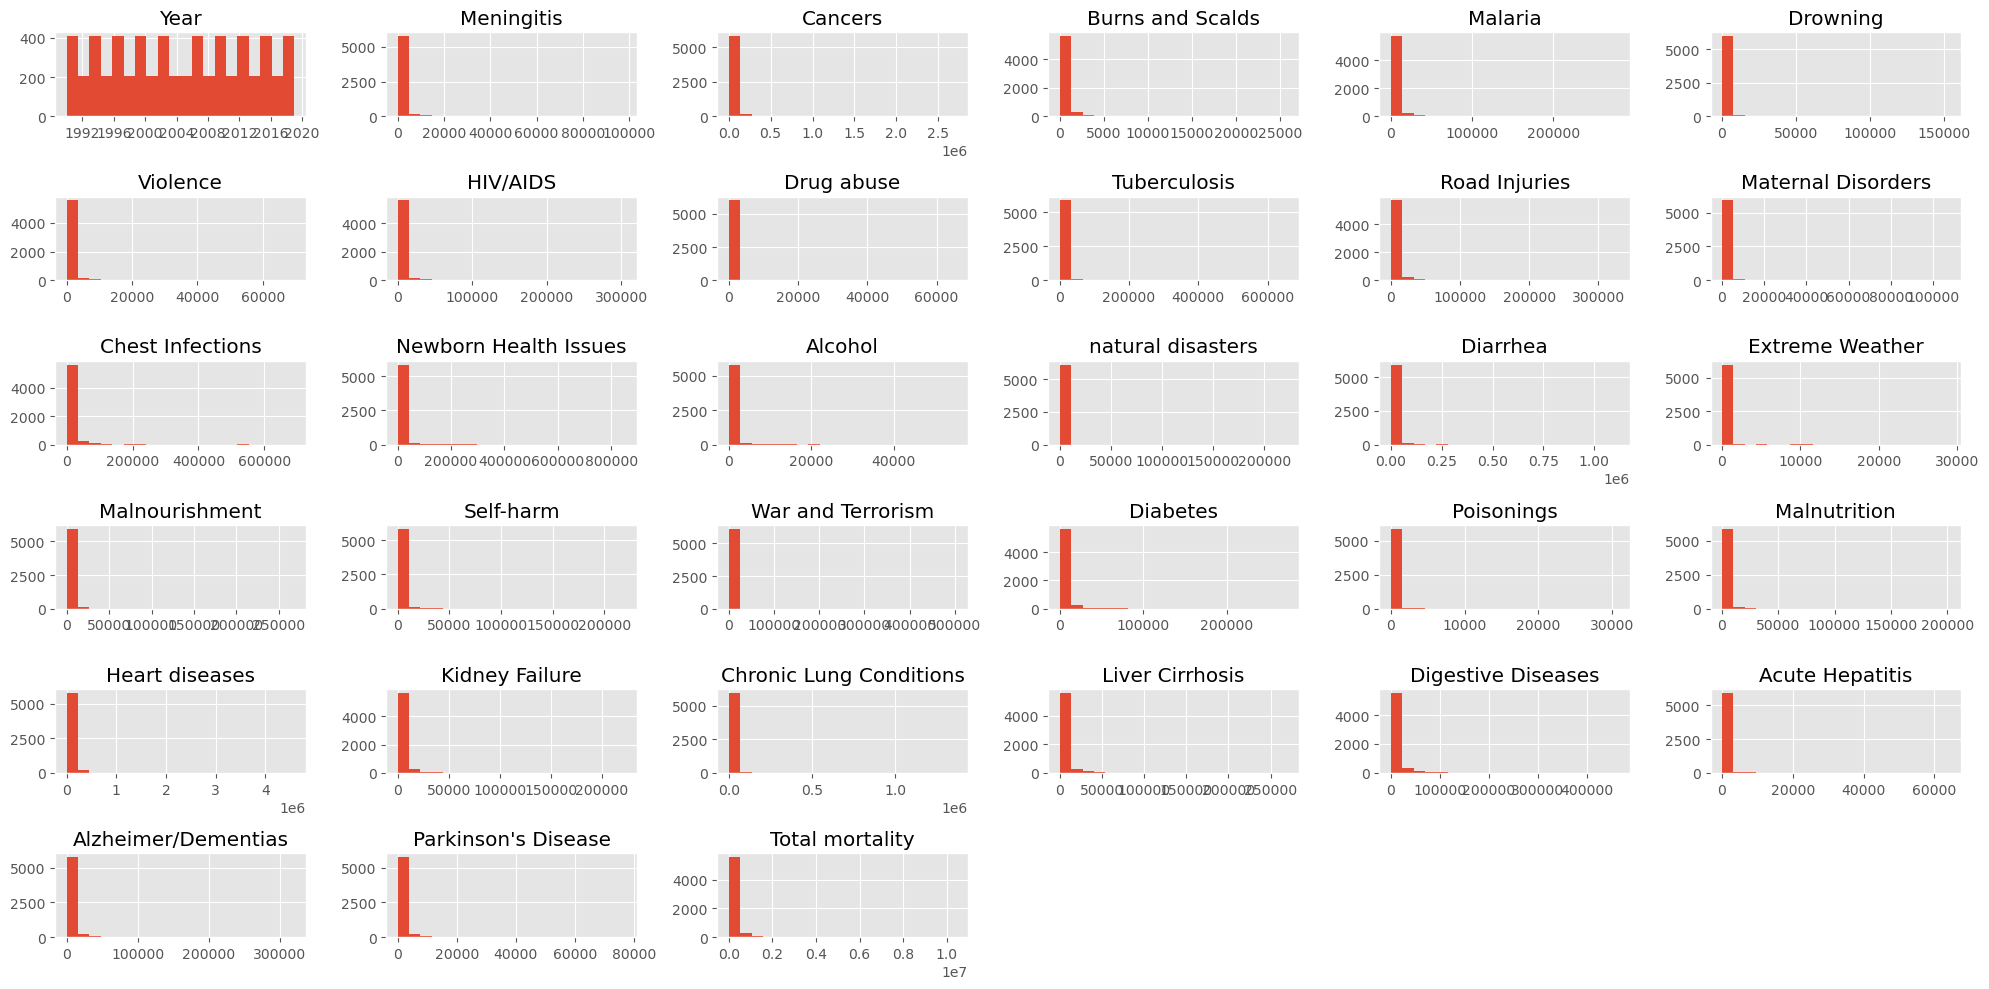

In [31]:
# ploting the histogram of numerical columns
# Checking data distribution of numerical columns via visual observation
df.hist(bins=20, figsize=(20,10))
plt.tight_layout()
plt.show()

In [32]:
# Normal test for checking data distribution
# Examining the distribution of the data by using normality test or Agostino-Pearson test

# Creating Numeric variable excluding datetime and non-numeric columns
numerical = [var for var in df.columns if df[var].dtypes not in ['object', '<M8[ns]']]

# Filter out columns with non-numeric values
numerical = [var for var in numerical if pd.to_numeric(df[var], errors='coerce').notnull().all()]


dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df[feature_name])

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson test", 'P-value', 'Distribution'])
dist_df

Feature  D'Agostino-Pearson test  P-value  \
0                Meningitis              8491.049662      0.0   
1                   Cancers              9873.076366      0.0   
2          Burns and Scalds              8668.350171      0.0   
3                   Malaria              9037.476413      0.0   
4                  Drowning              9763.990431      0.0   
5                  Violence              6708.830908      0.0   
6                  HIV/AIDS              7448.551403      0.0   
7                Drug abuse             11074.308792      0.0   
8              Tuberculosis             10457.828895      0.0   
9             Road Injuries              9173.390324      0.0   
10       Maternal Disorders             10599.052102      0.0   
11         Chest Infections              8955.058468      0.0   
12    Newborn Health Issues              9716.786293      0.0   
13                  Alcohol              9100.653606      0.0   
14        natural disasters             16804.836316      0.0   
15                 Diarrhea             10693.521427      0.0   
16          Extreme Weather              9810.512543      0.0   
17           Malnourishment             11704.431634      0.0   
18                Self-harm              8866.947634      0.0   
19        War and Terrorism             20695.239226      0.0   
20                 Diabetes              8387.734958      0.0   
21               Poisonings              9945.413930      0.0   
22             Malnutrition             11016.064713      0.0   
23           Heart diseases              9174.177203      0.0   
24           Kidney Failure              8269.695806      0.0   
25  Chronic Lung Conditions              9585.381036      0.0   
26          Liver Cirrhosis              8176.250131      0.0   
27       Digestive Diseases              8328.743240      0.0   
28          Acute Hepatitis             10772.915145      0.0   
29      Alzheimer/Dementias              8797.510625      0.0   
30      Parkinson's Disease              9135.879840      0.0   
31          Total mortality              8488.679216      0.0   

                Distribution  
0   Not Normally Distributed  
1   Not Normally Distributed  
2   Not Normally Distributed  
3   Not Normally Distributed  
4   Not Normally Distributed  
5   Not Normally Distributed  
6   Not Normally Distributed  
7   Not Normally Distributed  
8   Not Normally Distributed  
9   Not Normally Distributed  
10  Not Normally Distributed  
11  Not Normally Distributed  
12  Not Normally Distributed  
13  Not Normally Distributed  
14  Not Normally Distributed  
15  Not Normally Distributed  
16  Not Normally Distributed  
17  Not Normally Distributed  
18  Not Normally Distributed  
19  Not Normally Distributed  
20  Not Normally Distributed  
21  Not Normally Distributed  
22  Not Normally Distributed  
23  Not Normally Distributed  
24  Not Normally Distributed  
25  Not Normally Distributed  
26  Not Normally Distributed  
27  Not Normally Distributed  
28  Not Normally Distributed  
29  Not Normally Distributed  
30  Not Normally Distributed  
31  Not Normally Distributed

## **Exploratory Data Analysis**

After cleaning the dataset, data analysis was performed by analyzing the overview of the global mortality trend, analyzing Indonesia's mortality trend, and comparing both trends.

### **Global Mortality Analysis**

In [33]:
# Grouping data per country and per year
df_year_country = df.groupby(['Country', 'Year']).sum()
display(df_year_country.head(), df_year_country.tail())

Meningitis  Cancers  Burns and Scalds  Malaria  \
Country     Year                                                         
Afghanistan 1990-01-01      2159.0  11580.0             323.0     93.0   
            1991-01-01      2218.0  11796.0             332.0    189.0   
            1992-01-01      2475.0  12218.0             360.0    239.0   
            1993-01-01      2812.0  12634.0             396.0    108.0   
            1994-01-01      3027.0  12914.0             420.0    211.0   

                        Drowning  Violence  HIV/AIDS  Drug abuse  \
Country     Year                                                   
Afghanistan 1990-01-01    1370.0    1538.0      34.0        93.0   
            1991-01-01    1391.0    2001.0      41.0       102.0   
            1992-01-01    1514.0    2299.0      48.0       118.0   
            1993-01-01    1687.0    2589.0      56.0       132.0   
            1994-01-01    1809.0    2849.0      63.0       142.0   

                        Tuberculosis  Road Injuries  Maternal Disorders  \
Country     Year                                                          
Afghanistan 1990-01-01        4661.0         4154.0              2655.0   
            1991-01-01        4743.0         4472.0              2885.0   
            1992-01-01        4976.0         5106.0              3315.0   
            1993-01-01        5254.0         5681.0              3671.0   
            1994-01-01        5470.0         6001.0              3863.0   

                        Chest Infections  Newborn Health Issues  Alcohol  \
Country     Year                                                           
Afghanistan 1990-01-01           23741.0                15612.0     72.0   
            1991-01-01           24504.0                17128.0     75.0   
            1992-01-01           27404.0                20060.0     80.0   
            1993-01-01           31116.0                22335.0     85.0   
            1994-01-01           33390.0                23288.0     88.0   

                        natural disasters  Diarrhea  Extreme Weather  \
Country     Year                                                       
Afghanistan 1990-01-01                0.0    4235.0            175.0   
            1991-01-01             1347.0    4927.0            113.0   
            1992-01-01              614.0    6123.0             38.0   
            1993-01-01              225.0    8174.0             41.0   
            1994-01-01              160.0    8215.0             44.0   

                        Malnourishment  Self-harm  War and Terrorism  \
Country     Year                                                       
Afghanistan 1990-01-01          2087.0      696.0             1490.0   
            1991-01-01          2153.0      751.0             3370.0   
            1992-01-01          2441.0      855.0             4344.0   
            1993-01-01          2837.0      943.0             4096.0   
            1994-01-01          3081.0      993.0             8959.0   

                        Diabetes  Poisonings  Malnutrition  Heart diseases  \
Country     Year                                                             
Afghanistan 1990-01-01    2108.0       338.0        2054.0         44899.0   
            1991-01-01    2120.0       351.0        2119.0         45492.0   
            1992-01-01    2153.0       386.0        2404.0         46557.0   
            1993-01-01    2195.0       425.0        2797.0         47951.0   
            1994-01-01    2231.0       451.0        3038.0         49308.0   

                        Kidney Failure  Chronic Lung Conditions  \
Country     Year                                                  
Afghanistan 1990-01-01          3709.0                   5945.0   
            1991-01-01          3724.0                   6050.0   
            1992-01-01          3776.0                   6223.0   
            1993-01-01          3862.0                   6445.0   
          

Meningitis  Cancers  Burns and Scalds  Malaria  Drowning  \
Country  Year                                                                   
Zimbabwe 2015-01-01      1439.0  11161.0             632.0   2518.0     770.0   
         2016-01-01      1457.0  11465.0             648.0   2050.0     801.0   
         2017-01-01      1460.0  11744.0             654.0   2116.0     818.0   
         2018-01-01      1450.0  12038.0             657.0   2088.0     825.0   
         2019-01-01      1450.0  12353.0             662.0   2068.0     827.0   

                     Violence  HIV/AIDS  Drug abuse  Tuberculosis  \
Country  Year                                                       
Zimbabwe 2015-01-01    1302.0   29162.0       104.0       11214.0   
         2016-01-01    1342.0   27141.0       110.0       10998.0   
         2017-01-01    1363.0   24846.0       115.0       10762.0   
         2018-01-01    1396.0   22106.0       121.0       10545.0   
         2019-01-01    1434.0   20722.0       127.0       10465.0   

                     Road Injuries  Maternal Disorders  Chest Infections  \
Country  Year                                                              
Zimbabwe 2015-01-01         2373.0              1355.0           12974.0   
         2016-01-01         2436.0              1338.0           13024.0   
         2017-01-01         2473.0              1312.0           12961.0   
         2018-01-01         2509.0              1294.0           12860.0   
         2019-01-01         2554.0              1294.0           12897.0   

                     Newborn Health Issues  Alcohol  natural disasters  \
Country  Year                                                            
Zimbabwe 2015-01-01                 9278.0     48.0               15.0   
         2016-01-01                 9065.0     49.0               31.0   
         2017-01-01                 8901.0     50.0              251.0   
         2018-01-01                 8697.0     51.0                0.0   
         2019-01-01                 8609.0     53.0              660.0   

                     Diarrhea  Extreme Weather  Malnourishment  Self-harm  \
Country  Year                                                               
Zimbabwe 2015-01-01    5102.0             37.0          3019.0     2235.0   
         2016-01-01    5002.0             37.0          3056.0     2297.0   
         2017-01-01    4948.0             37.0          2990.0     2338.0   
         2018-01-01    4745.0             37.0          2918.0     2372.0   
         2019-01-01    4635.0             37.0          2884.0     2403.0   

                     War and Terrorism  Diabetes  Poisonings  Malnutrition  \
Country  Year                                                                
Zimbabwe 2015-01-01               13.0    3176.0       381.0        2990.0   
         2016-01-01                6.0    3259.0       393.0        3027.0   
         2017-01-01                5.0    3313.0       398.0        2962.0   
         2018-01-01                9.0    3381.0       400.0        2890.0   
         2019-01-01               11.0    3460.0       405.0        2855.0   

                     Heart diseases  Kidney Failure  Chronic Lung Conditions  \
Country  Year                                                                  
Zimbabwe 2015-01-01         16649.0          2108.0                   2751.0   
         2016-01-01         16937.0          2160.0                   2788.0   
         2017-01-01         17187.0          2196.0                   2818.0   
         2018-01-01         17460.0          2240.0                   2849.0   
         2019-01-01         17810.0          2292.0                   2891.0   

                     Liver Cirrhosis  Digestive Diseases  Acute Hepatitis  \
Country  Year                                                               
Zimbabwe 2015-01-01           1956.0              4202.0            146.0   
         2016-01-01           1962.0  

In [34]:
# Statistical descriptive of all countries based on total mortality

# Reset the display option to default
pd.reset_option('display.max_rows')

# Aggregating data total mortality per counry
df[["Country", "Total mortality"]].groupby("Country").describe()

Total mortality                                         \
                         count           mean           std       min   
Country                                                                 
Afghanistan               30.0  199421.000000  16558.354999  147971.0   
Albania                   30.0   17451.633333   2031.253197   15093.0   
Algeria                   30.0  153373.500000  16398.545019  134143.0   
American Samoa            30.0     287.466667     46.070960     204.0   
Andorra                   30.0     417.833333    103.301061     239.0   
...                        ...            ...           ...       ...   
Venezuela                 30.0  123258.300000  27944.522428   83094.0   
Vietnam                   30.0  481488.366667  75051.218322  403173.0   
Yemen                     30.0  136287.500000  11560.728091  126712.0   
Zambia                    30.0  137023.633333  18510.982869  104287.0   
Zimbabwe                  30.0  147286.200000  36208.195042   74755.0   

                                                          
                      25%       50%        75%       max  
Country                                                   
Afghanistan     195520.00  203418.0  207466.25  219770.0  
Albania          16019.75   16779.0   18157.50   22235.0  
Algeria         143011.50  146323.5  162213.25  192286.0  
American Samoa     253.25     290.0     328.25     361.0  
Andorra            330.00     426.0     502.50     587.0  
...                   ...       ...        ...       ...  
Venezuela        96893.00  120976.0  143909.50  181325.0  
Vietnam         410253.25  463283.0  546377.00  619258.0  
Yemen           130433.75  132352.0  135357.50  176125.0  
Zambia          120936.25  131233.5  155257.25  166558.0  
Zimbabwe        124283.75  143258.5  182272.25  196857.0  

[204 rows x 8 columns]

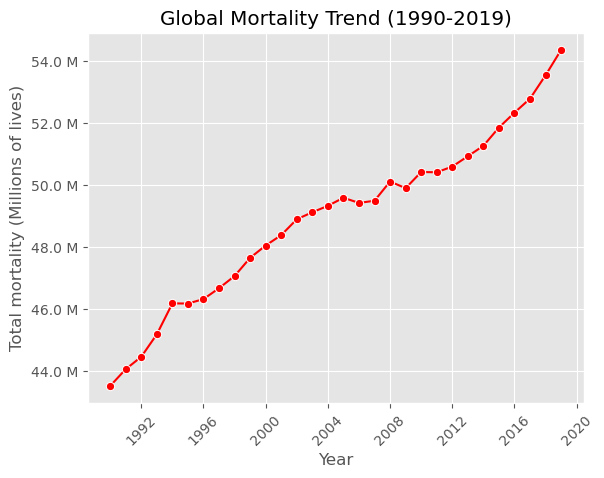

<Figure size 2000x1200 with 0 Axes>

In [35]:
# 30 years global mortality trends (Data visualization)

# Group the data and sort by year
df0 = df[["Year", "Total mortality"]].groupby("Year").sum().reset_index().sort_values(by="Year")

# Using function to define a format of million
def million_formatter(x, pos):
    return "%.1f M" % (x / 1e6)  # Adjusted to format in millions

# Create the seaborn line plot
a = sns.lineplot(x="Year", y="Total mortality", data=df0, marker="o", color="red")

# Customize the plot with seaborn functions
a.yaxis.set_major_formatter(million_formatter)  # Applying the formatter to y-axis

plt.title("Global Mortality Trend (1990-2019)")
plt.xlabel("Year")
plt.ylabel("Total mortality (Millions of lives)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Enhance figure size and style (adjust as needed)
plt.figure(figsize=(20, 12))
plt.tight_layout()

# Display the plot
plt.show()

**Insight**

Overall, global mortality rates have steadily risen, exceeding 54 million deaths in 2019.

**Sorting and ranking the global mortality cause**

In [36]:
# Sorting the causes based on the total (accumulated) mortality from 1990 to 2019
cause_death_df = df.iloc[:,2:-1].sum().to_frame()
cause_death_df.rename(columns={0:"mortality"}, inplace=True)
cause_death_df = cause_death_df.rename_axis('causes')
cause_death_df = cause_death_df.sort_values(by='mortality',ascending=False)
cause_death_df

mortality
causes                              
Heart diseases           447741982.0
Cancers                  229758530.0
Chronic Lung Conditions  104605337.0
Chest Infections          83770039.0
Newborn Health Issues     76860737.0
Diarrhea                  66235505.0
Digestive Diseases        65638638.0
Tuberculosis              45850602.0
Liver Cirrhosis           37479314.0
HIV/AIDS                  36364418.0
Road Injuries             36296477.0
Diabetes                  31448868.0
Alzheimer/Dementias       29768846.0
Kidney Failure            28911690.0
Malaria                   25342680.0
Self-harm                 23713928.0
Malnourishment            13792037.0
Violence                  12752839.0
Malnutrition              12031888.0
Meningitis                10524570.0
Drowning                  10302001.0
Maternal Disorders         7727053.0
Parkinson's Disease        7179804.0
Alcohol                    4819015.0
Acute Hepatitis            3784799.0
Burns and Scalds           3602920.0
War and Terrorism          3294051.0
Drug abuse                 2656122.0
Poisonings                 2601086.0
Extreme Weather            1788858.0
natural disasters          1490126.0

**Top 5 causes of global mortality**

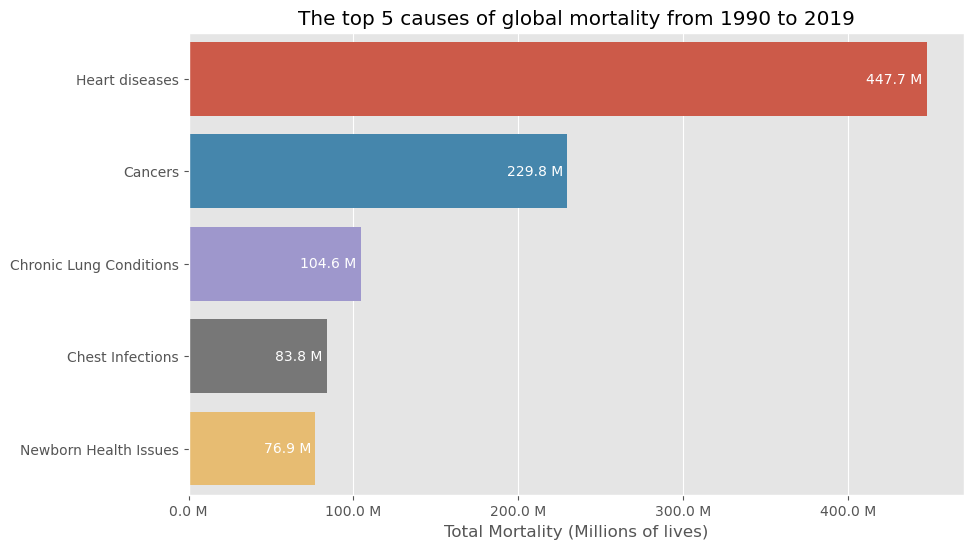

In [38]:
# Top 5 causes of global mortality

# Sorting the causes based on the total (accumulated) mortality from 1990 to 2019
cause_death_df = df.iloc[:, 2:-1].sum().to_frame()
cause_death_df.rename(columns={0: "mortality"}, inplace=True)
cause_death_df = cause_death_df.rename_axis('causes')
cause_death_df = cause_death_df.sort_values(by='mortality', ascending=False)

# Sorting the top 5 causes with the highest mortality
top_5_causes = cause_death_df.head(5)

# Resetting index of top_5_causes DataFrame
top_5_causes.reset_index(inplace=True)

# Define million_formatter function
def million_formatter(x, pos):
    return "%.1f M" % (x / 1e6)  # Format to display in millions with 1 decimal place

# Define annotate_bars function
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width() / 1e6:.1f} M ',
            va='center', ha='right', color='white'
        )
    return ax

# Setting the width and height of figure
fig, ax = plt.subplots(figsize=(10, 6))

# Creating horizontal bar charts
sns.barplot(x='mortality', y='causes', data=top_5_causes, zorder=2)

# Adding title and labels
plt.title('The top 5 causes of global mortality from 1990 to 2019')
plt.xlabel('Total Mortality (Millions of lives)')
plt.ylabel('')  # No ylabel for better presentation

# Apply million_formatter to x-axis
plt.gca().xaxis.set_major_formatter(million_formatter)

# Annotate bars with labels representing millions
annotate_bars(ax)

# Displaying bar charts
plt.show()


Non-communicable diseases dominate global mortality, including heart diseases, cancers, chronic lung conditions, chest infections, and newborn health issues, posing significant public health and economic burdens.

**All countries mortality**

In [39]:
# All country mortality during 30 years
# Creating pivot table based on country and total mortality
sum_mortality_30 = pd.pivot_table(data=df[['Country', 'Total mortality']],
                                   index=['Country'],
                                   values='Total mortality',
                                   aggfunc='sum'
).reset_index()
sum_mortality_30

Country  Total mortality
0       Afghanistan        5982630.0
1           Albania         523549.0
2           Algeria        4601205.0
3    American Samoa           8624.0
4           Andorra          12535.0
..              ...              ...
199       Venezuela        3697749.0
200         Vietnam       14444651.0
201           Yemen        4088625.0
202          Zambia        4110709.0
203        Zimbabwe        4418586.0

[204 rows x 2 columns]

**The top 5 countries with the highest mortality from 1990 to 2019**

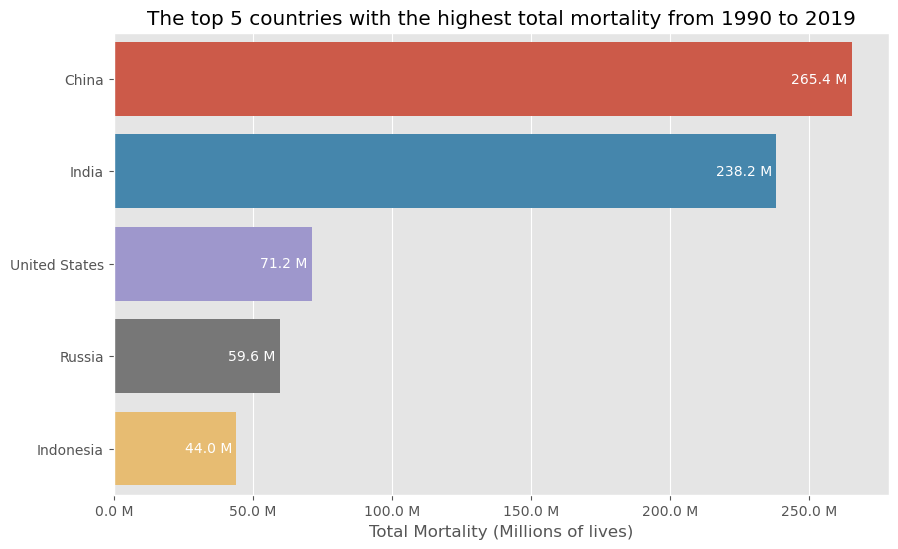

In [40]:
# The top 5 countries with highest mortality (Data visualization)

# Sorting and ranking the top 5 countries with the highest mortality
top_5_countries_mortality = sum_mortality_30.sort_values(by='Total mortality', ascending=False).head(5)
top_5_countries_mortality


# Define million_formatter function
def million_formatter(x, pos):
    return "%.1f M" % (x / 1e6)  # Format to display in millions with 1 decimal place

# Define annotate_bars function
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width() / 1e6:.1f} M ',
            va='center', ha='right', color='white'
        )
    return ax

# Setting the width and height of figure
fig, ax = plt.subplots(figsize=(10,6))

# Creating horizontal bar charts
sns.barplot(x='Total mortality', y='Country', data=top_5_countries_mortality, zorder=2)

# Adding title and labels
plt.title('The top 5 countries with the highest total mortality from 1990 to 2019')
plt.xlabel('Total Mortality (Millions of lives)')
plt.ylabel('')  # No ylabel for better presentation


# Apply million_formatter to x-axis
plt.gca().xaxis.set_major_formatter(million_formatter)

# Annotate bars with labels representing millions
annotate_bars(ax)

# Displaying bar charts
plt.show()

Analysis of global mortality data reveals that China, India, the United States, Russia, and Indonesia are among the top contributors to total mortality.

### **Indonesia's Mortality Analysis**

Indonesia, ranked fifth in global mortality, plays a crucial role in shaping global mortality trends.

In [41]:
# Mortality of Indonesia
# Filtering mortality cause data only for the country of Indonesia
df_indonesia = df[df['Country'] == 'Indonesia']
df_indonesia.head()

Country       Year  Meningitis   Cancers  Burns and Scalds  Malaria  \
2460  Indonesia 2007-01-01     10001.0  164406.0            1671.0   2376.0   
2461  Indonesia 2008-01-01      9608.0  168946.0            1636.0   2261.0   
2462  Indonesia 2009-01-01      9183.0  173532.0            1632.0   3012.0   
2463  Indonesia 2013-01-01      7915.0  193469.0            1544.0   1480.0   
2464  Indonesia 2015-01-01      6946.0  202962.0            1529.0    979.0   

      Drowning  Violence  HIV/AIDS  Drug abuse  Tuberculosis  Road Injuries  \
2460    7087.0    2669.0    2791.0       467.0      109058.0        43361.0   
2461    7051.0    2600.0    2882.0       474.0      106904.0        41950.0   
2462    6946.0    2540.0    3095.0       479.0      104609.0        40737.0   
2463    6102.0    2367.0    4852.0       517.0       89584.0        37777.0   
2464    5630.0    2311.0    5316.0       542.0       83909.0        36868.0   

      Maternal Disorders  Chest Infections  Newborn Health Issues  Alcohol  \
2460             11225.0           54227.0                72361.0    578.0   
2461             10617.0           53221.0                70046.0    586.0   
2462             10075.0           51750.0                67620.0    593.0   
2463              7634.0           47309.0                54739.0    611.0   
2464              6520.0           46032.0                48419.0    617.0   

      natural disasters  Diarrhea  Extreme Weather  Malnourishment  Self-harm  \
2460              694.0   79695.0            124.0         17906.0     7725.0   
2461              132.0   77723.0            126.0         18472.0     7704.0   
2462             1497.0   75605.0            126.0         18940.0     7691.0   
2463              173.0   66978.0            127.0         20669.0     7474.0   
2464               54.0   64578.0            136.0         21526.0     7410.0   

      War and Terrorism  Diabetes  Poisonings  Malnutrition  Heart diseases  \
2460               37.0   63071.0       896.0       16285.0        484163.0   
2461                7.0   67098.0       940.0       16862.0        500374.0   
2462               53.0   70947.0       969.0       17355.0        514806.0   
2463               43.0   87432.0       985.0       19087.0        573039.0   
2464               34.0   95843.0       975.0       19855.0        603096.0   

      Kidney Failure  Chronic Lung Conditions  Liver Cirrhosis  \
2460         34407.0                  93117.0          79592.0   
2461         35225.0                  93640.0          80826.0   
2462         35997.0                  94419.0          81959.0   
2463         37624.0                  95674.0          84230.0   
2464         38126.0                  96559.0          83201.0   

      Digestive Diseases  Acute Hepatitis  Alzheimer/Dementias  \
2460            112629.0           7401.0              17364.0   
2461            113979.0           6703.0              17867.0   
2462            115272.0           6235.0              18357.0   
2463            119354.0           5799.0              20365.0   
2464            119335.0           5912.0              21485.0   

      Parkinson's Disease  Total mortality  
2460               5285.0        1502669.0  
2461               5476.0        1521936.0  
2462               5649.0        1541680.0  
2463               6392.0        1601345.0  
2464               6737.0        1633442.0

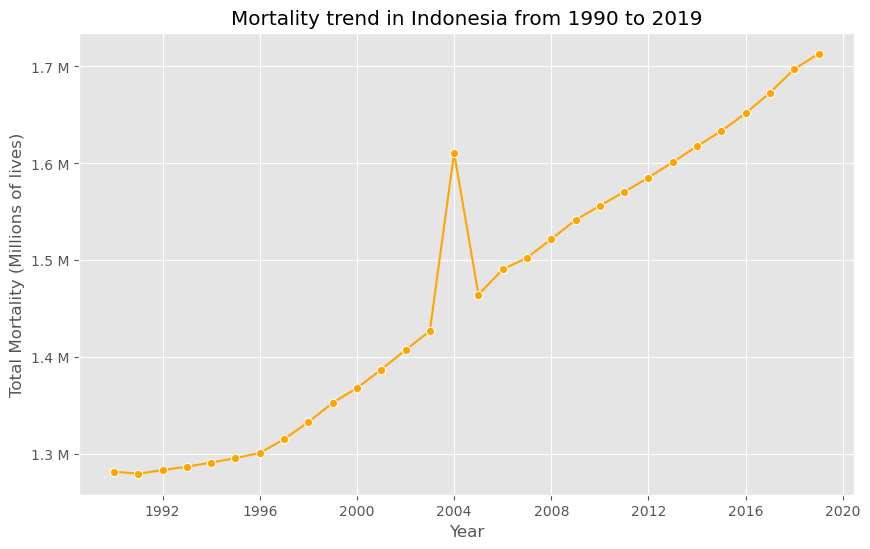

In [42]:
# Mortality trend in Indonesia within 30 years of data
df_indo_mortality_trend = df_indonesia[["Year", "Total mortality"]].groupby("Year").sum().reset_index()


# Using function to define a format of million
def million_formatter(x, pos):
    return "%.1f M" % (x / 1e6)  # Adjusted to format in millions

# Create Seaborn line plot
plt.figure(figsize=(10, 6))
a = sns.lineplot(data=df_indo_mortality_trend, x='Year', y='Total mortality', color='orange', marker="o")

# Customize the plot with seaborn functions
a.yaxis.set_major_formatter(million_formatter)  # Applying the formatter to y-axis

# Customize the plot
plt.xlabel('Year')
plt.ylabel("Total Mortality (Millions of lives)")
plt.title('Mortality trend in Indonesia from 1990 to 2019')

# Show the plot
plt.show()

In 2019, mortality in Indonesia exceeded 1.7 million lives, with an overall upward trend over the past three decades. Notably, the 2004 Aceh tsunami caused a significant spike in mortality, claiming approximately 129,775 lives (Tsunami Recovery Status Report, 2005).

**Calculating the accumulated total mortality of Indonesia from each cause**

In [43]:
# Calculating the accumulated total mortality of Indonesia from each cause

idn_cause_death_df = df_indonesia.iloc[:,2:-1].sum().to_frame().reset_index()
idn_cause_death_df.rename(columns={"index": "causes", 0:"mortality"}, inplace=True)
idn_cause_death_df = idn_cause_death_df.sort_values(by='mortality',ascending=False)
idn_cause_death_df

causes   mortality
23           Heart diseases  13587012.0
1                   Cancers   4672674.0
27       Digestive Diseases   3204786.0
8              Tuberculosis   3197011.0
15                 Diarrhea   2590656.0
25  Chronic Lung Conditions   2559457.0
26          Liver Cirrhosis   2249388.0
12    Newborn Health Issues   2238128.0
20                 Diabetes   1888549.0
11         Chest Infections   1820769.0
9             Road Injuries   1325509.0
24           Kidney Failure    964478.0
17           Malnourishment    604467.0
22             Malnutrition    560546.0
29      Alzheimer/Dementias    487566.0
10       Maternal Disorders    376966.0
0                Meningitis    337724.0
4                  Drowning    237902.0
28          Acute Hepatitis    231909.0
18                Self-harm    223144.0
14        natural disasters    191692.0
30      Parkinson's Disease    145752.0
5                  Violence     81342.0
6                  HIV/AIDS     74981.0
3                   Malaria     74664.0
2          Burns and Scalds     51790.0
21               Poisonings     27837.0
13                  Alcohol     16158.0
7                Drug abuse     12980.0
19        War and Terrorism      7489.0
16          Extreme Weather      3614.0

To delve deeper, the 30 years of Indonesia's data was divided into three consecutive 10-year periods,

**1. Mortality cause of Indonesia from 1990 to 1999**

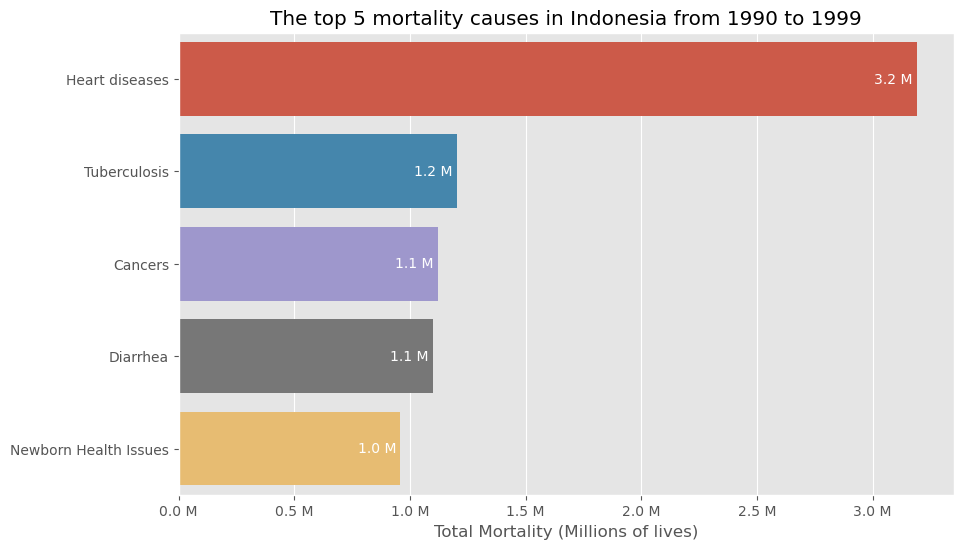

In [45]:
# The top 5 causes of mortality in Indonesia from 1990 to 1999

# Calculating the accumulated total mortality of Indonesia from each cause from 1990 to 1999
idn_cause_death_df_1990_1999 = df_indonesia.loc[df_indonesia['Year'] < pd.Timestamp('2000-01-01'), 'Meningitis':'Acute Hepatitis'].sum().to_frame()
idn_cause_death_df_1990_1999.rename(columns={0: "mortality"}, inplace=True)
idn_cause_death_df_1990_1999 = idn_cause_death_df_1990_1999.rename_axis('causes')
idn_cause_death_df_1990_1999 = idn_cause_death_df_1990_1999.sort_values(by='mortality', ascending=False)

# Resetting the index
idn_cause_death_df_1990_1999.reset_index(inplace=True)

# Top 5 causes in Indonesia
# Ranking and sorting the top 5 cause with highest mortality
top_5_causes_idn_1990_1999 = idn_cause_death_df_1990_1999.head(5)

# Define million_formatter function
def million_formatter(x, pos):
    return "%.1f M" % (x / 1e6)  # Format to display in millions with 1 decimal place

# Define annotate_bars function
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width() / 1e6:.1f} M ',
            va='center', ha='right', color='white'
        )
    return ax

# Setting the width and height of figure
fig, ax = plt.subplots(figsize=(10,6))

# Creating horizontal bar charts
sns.barplot(x='mortality', y='causes', data=top_5_causes_idn_1990_1999, zorder=2)  # Set zorder for the bar plot

# Adding title and labels
plt.title('The top 5 mortality causes in Indonesia from 1990 to 1999')
plt.xlabel('Total Mortality (Millions of lives)')
plt.ylabel('')  # No ylabel for better presentation

# Apply million_formatter to x-axis
plt.gca().xaxis.set_major_formatter(million_formatter)

# Annotate bars with labels representing millions
annotate_bars(ax)

# Displaying bar charts
plt.show()


**1990-1999**: Heart diseases remained the leading cause of mortality, followed by tuberculosis and cancers.

**2. Mortality cause of Indonesia from 2000 to 2009**

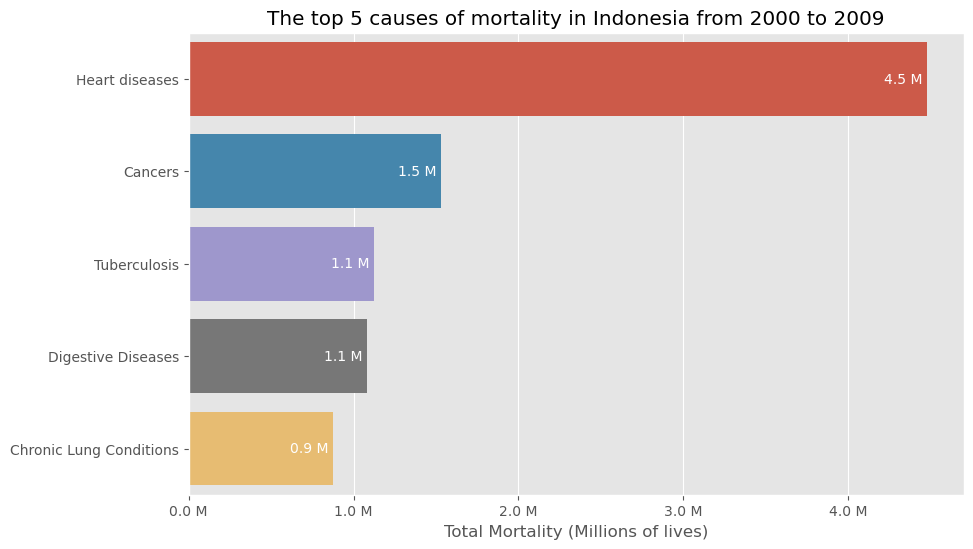

In [47]:
# The top 5 causes of mortality in Indonesia from 2000 to 2009

# Calculating the accumulated total mortality of Indonesia from each cause from 2000 to 2009
idn_cause_death_df_2000_2009 = df_indonesia.loc[(df_indonesia['Year'] >= pd.Timestamp('2000-01-01')) & (df_indonesia['Year'] < pd.Timestamp('2010-01-01')) , 'Meningitis':'Acute Hepatitis'].sum().to_frame()
idn_cause_death_df_2000_2009.rename(columns={0:"mortality"}, inplace=True)
idn_cause_death_df_2000_2009 = idn_cause_death_df_2000_2009.rename_axis('causes')
idn_cause_death_df_2000_2009 = idn_cause_death_df_2000_2009.sort_values(by='mortality',ascending=False)

# Ranking and sorting the top 5 cause with highest mortality
top_5_causes_idn_2000_2009 = idn_cause_death_df_2000_2009.head(5)

# Define million_formatter function
def million_formatter(x, pos):
    return "%.1f M" % (x / 1e6)  # Format to display in millions with 1 decimal place

# Define annotate_bars function
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width() / 1e6:.1f} M ',
            va='center', ha='right', color='white'
        )
    return ax

# Setting the width and height of figure
fig, ax = plt.subplots(figsize=(10,6))

# Creating horizontal bar charts
sns.barplot(x='mortality', y='causes', data=top_5_causes_idn_2000_2009.reset_index(), zorder=2)  # Set zorder for the bar plot

# Adding title and labels
plt.title('The top 5 causes of mortality in Indonesia from 2000 to 2009')
plt.xlabel('Total Mortality (Millions of lives)')
plt.ylabel('')  # No ylabel for better presentation

# Apply million_formatter to x-axis
plt.gca().xaxis.set_major_formatter(million_formatter)

# Annotate bars with labels representing millions
annotate_bars(ax)

# Displaying bar charts
plt.show()


**2000-2009**: Heart diseases continued to dominate, followed by cancers and tuberculosis.

**3. Mortality cause of Indonesia from 2009 to 2019**

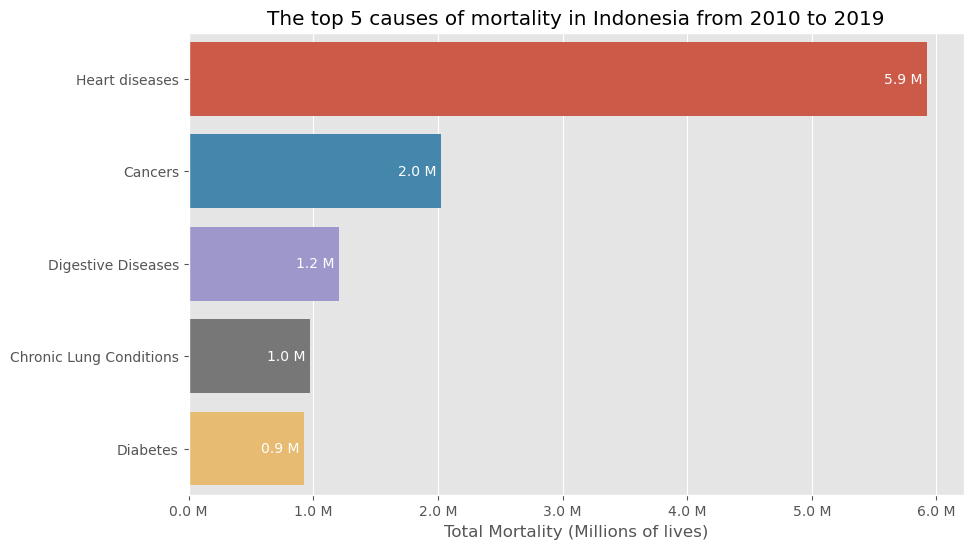

In [49]:
# The top 5 causes of mortality in Indonesia from 2010 to 2019

# Calculating the accumulated total mortality of Indonesia from each cause from 2010 to 2019
idn_cause_death_df_2010_2019 = df_indonesia.loc[(df_indonesia['Year'] >= pd.Timestamp('2010-01-01')) & (df_indonesia['Year'] < pd.Timestamp('2020-01-01')), 'Meningitis':'Acute Hepatitis'].sum().to_frame()
idn_cause_death_df_2010_2019.rename(columns={0: "mortality"}, inplace=True)
idn_cause_death_df_2010_2019 = idn_cause_death_df_2010_2019.rename_axis('causes')
idn_cause_death_df_2010_2019 = idn_cause_death_df_2010_2019.sort_values(by='mortality', ascending=False)

# Ranking and sorting the top 5 cause with highest mortality
top_5_causes_idn_2010_2019 = idn_cause_death_df_2010_2019.head(5)

# Define million_formatter function
def million_formatter(x, pos):
    return "%.1f M" % (x / 1e6)  # Format to display in millions with 1 decimal place

# Define annotate_bars function
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width() / 1e6:.1f} M ',
            va='center', ha='right', color='white'
        )
    return ax

# Setting the width and height of figure
fig, ax = plt.subplots(figsize=(10,6))

# Creating horizontal bar charts
sns.barplot(x='mortality', y='causes', data=top_5_causes_idn_2010_2019.reset_index(), zorder=2)  # Set zorder for the bar plot

# Adding title and labels
plt.title('The top 5 causes of mortality in Indonesia from 2010 to 2019')
plt.xlabel('Total Mortality (Millions of lives)')
plt.ylabel('')  # No ylabel for better presentation

# Apply million_formatter to x-axis
plt.gca().xaxis.set_major_formatter(million_formatter)

# Annotate bars with labels representing millions
annotate_bars(ax)

# Displaying bar charts
plt.show()


**2010-2019**: While heart diseases and cancers remained prevalent, tuberculosis mortality rates declined, possibly indicating improvements in healthcare interventions. 

**The top 5 causes of mortality in Indonesia within 30 years (1990-2019)**

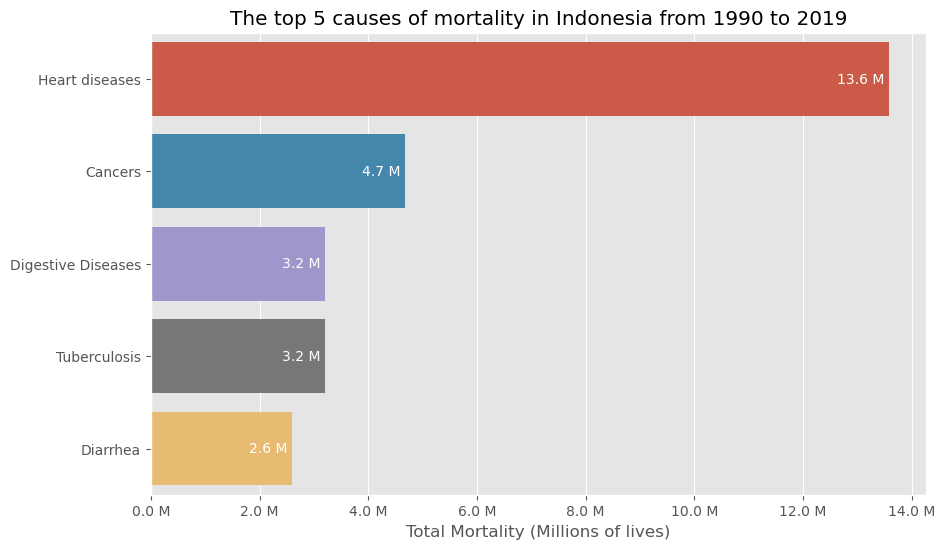

In [50]:
# The top 5 causes of mortality in Indonesia within 30 years (1990-2019)

# Top 5 causes in Indonesia
# Ranking and sorting the top 5 cause with highest mortality
top_5_causes_idn = idn_cause_death_df.head(5)
top_5_causes_idn


# Define million_formatter function
def million_formatter(x, pos):
    return "%.1f M" % (x / 1e6)  # Format to display in millions with 1 decimal place

# Define annotate_bars function
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width() / 1e6:.1f} M ',
            va='center', ha='right', color='white'
        )
    return ax

# Setting the width and height of figure
fig, ax = plt.subplots(figsize=(10,6))

# Creating horizontal bar charts
sns.barplot(x='mortality', y='causes', data=top_5_causes_idn, zorder=2)  # Set zorder for the bar plot

# Adding title and labels
plt.title('The top 5 causes of mortality in Indonesia from 1990 to 2019')
plt.xlabel('Total Mortality (Millions of lives)')
plt.ylabel('')  # No ylabel for better presentation

# Apply million_formatter to x-axis
plt.gca().xaxis.set_major_formatter(million_formatter)

# Annotate bars with labels representing millions
annotate_bars(ax)

# Displaying bar charts
plt.show()

## **Insights and Recommendations**

### **Insights** 
**Comparison of Indonesia's mortality trend and global**

In summary, Indonesia's 30-year mortality profile differs from the global pattern, with significant contributions from communicable diseases alongside non-communicable diseases. While non-communicable diseases like cardiovascular diseases and cancers are present, communicable diseases such as tuberculosis and diarrheal diseases play a more significant role in Indonesia.

### **Recommendations**

**Recommendations for Policy Formulation**
* Leverage data for evidence-based policies and interventions.
* Prioritize funding and resources toward addressing prevalent causes such as cardiovascular diseases and cancers. Implement prevention, early detection, and treatment.
* Implement preventive measures and awareness campaigns to reduce the burden of diseases like Tuberculosis and diarrheal diseases.
* Strengthen healthcare infrastructure to improve access to quality healthcare services.

**Recommendations for the Health Industry**
* Develop affordable and effective treatments for prevalent diseases.
* Research and innovate in diagnostics and therapies for Tuberculosis and digestive diseases.
* Collaborate with government initiatives to improve healthcare access and delivery across Indonesia.

**Call to Action**
* Individuals: Practice healthy lifestyles, seek preventive healthcare, and advocate for improved healthcare access.
* Governments: Utilize data for evidence-based policymaking, prioritize funding for prevalent diseases, and strengthen healthcare infrastructure.
* Healthcare Industry: Invest in research and development of affordable treatments and collaborate with governments on public health initiatives.
* Communities: Raise awareness about health challenges and promote healthy behaviors within communities.

## **Data Visualizations**

Data Visualizations : https://global-mortality-cause-in-indonesia.streamlit.app/ (Streamlit)

## **References**
* Institute for Health Metrics and Evaluation (IHME) (2014). Financing Global Health.(www.healthdata.org/research-analysis/library/financing-global-health-2013-transition-age-austerity)
* IPSOS (2023). Global Perceptions of Healthcare 2023.(www.ipsos.com/sites/default/files/ct/news/documents/2023-07/ipsos-global-perceptions-of-healthcare-2023.pdf)
* Max Roser, Hannah Ritchie, and Fiona Spooner (2021). Burden of Disease.(https://ourworldindata.org/burden-of-disease)
* Ministry of Health Indonesia (2023). Health Budget 2024 (https://sehatnegeriku.kemkes.go.id/baca/rilis-media/20230816/0643661/anggaran-kesehatan-2024-ditetapkan-sebesar-5-6-dari-apbn-naik-8-1-dibanding-2023) [Bahasa]
* Ministry of Health Indonesia (2022). Report: Tuberculosis Control in Indonesia 2022.
* Tsunami Recovery Status Report (2005) United Nations Information Management Service in collaboration with the Rehabilitation and Reconstruction Agency, Sumatra, Indonesia. 